# **Problem Statement**

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


### **Exploratory Data Analysis**

### Reading and Understanding data

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [8]:
df.isnull().sum().sum()

0

We can see no missing value in entire dataset. So there is no necessary to handle null value in entire dataset

### **Outliers treatment**
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### **Observing distribution of classes**


In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Percentage of fraudulent vs non-fraudulent transcations

In [10]:
print("Normal Share: ",round(normal_share,2))
print("Fraud Share: ",round(fraud_share,2))

Normal Share:  99.83
Fraud Share:  0.17


This data set is highly unbalanced, with the positive class (frauds) accounting for 0.17% of the total transactions.

### **Creating a bar plot for the number**

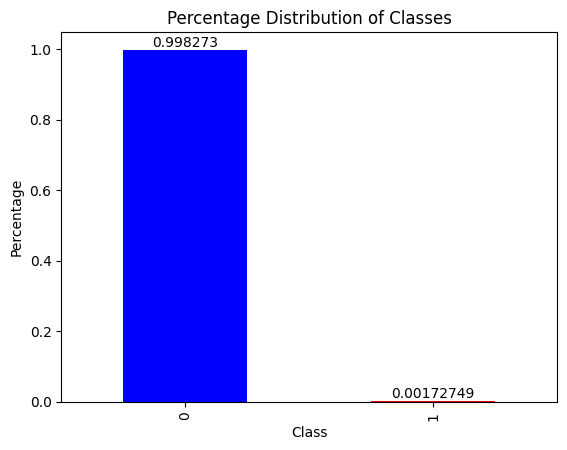

In [11]:
ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['b', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

### **Creating a scatter plot to observe the distribution of classes with time**

In [12]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]


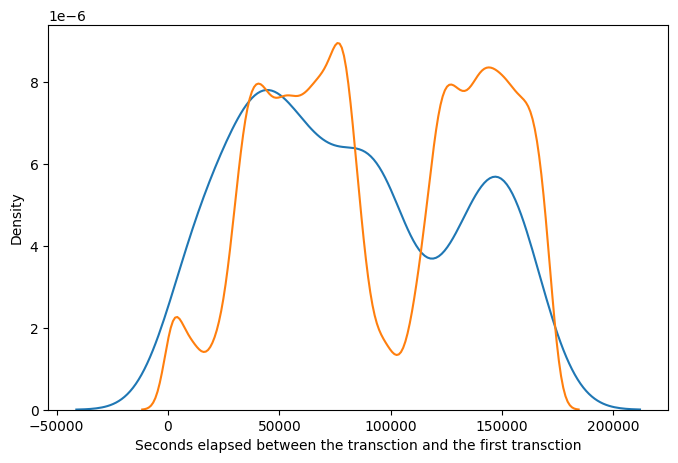

In [13]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


### Creating a scatter plot to observe the distribution of classes with time


In [14]:
df[df.Class==1].Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

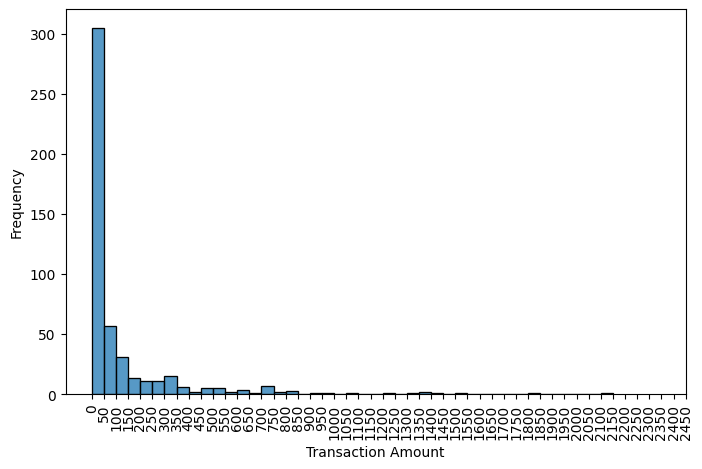

In [15]:
# distribution of Fradulent data

plt.figure(figsize=(8, 5))
sns.histplot(data_fraud['Amount'], binwidth=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()


Analysis

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### **Dropping unnecessary column**

There is no specific pattern of fraudent and non fraudent transaction with respect to time hence we can drop time column


In [16]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)


In [17]:
df.shape

(284807, 30)

## **Splitting the data into train & test data**

In [18]:
# Import library
from sklearn.model_selection import train_test_split


In [19]:
#Feature Variable
X = df.drop(['Class'], axis=1)


In [20]:
#Target Variable
y = df['Class']

In [21]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


In [22]:
# Validating X
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 29 columns]

In [23]:
# Validating y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### **Preserving X_test & y_test to evaluate on the test data once you build the model**

In [24]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### **Feature Scaling**

We need to scale amount column since other columns are already scaled with PCA transformation

In [25]:
# Standardization method
from sklearn.preprocessing import StandardScaler


In [26]:
# Instantiate the Scaler
scaler = StandardScaler()


In [27]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


In [28]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10  ...       V20       V21       V22  \
201788  0.192230  1.124319 -0.037763  ... -0.171390 -0.195207 -0.477813   
179369 -0.049137 -0.732566  0.297692  ...  0.206709 -0.124288 -0.263560   
73138   0.919341 -0.612193 -0.966197  ...  0.842838  0.274911 -0.319550   
208679 -0.539483 -0.813368  0.785431  ... -0.196551 -0.406722 -0.899081   
206534 -0.449263 -0.717258  0.851668  ... -0.045417  0.050447  0.125601   

             V23       V24       V25       V26       V27       V28    Amount  
201788  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947 -0.345273  
179369 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053 -0.206439  
73138   0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257  0.358043  
208679  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488  0.362400  
206534  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872 -0.316109  

[5 rows x 29 columns]

# Scaling the test data

In [29]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()


V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10  ...       V20       V21       V22  \
49089   1.036103  0.745991 -0.147304  ... -0.057922 -0.170060 -0.288750   
154704  0.752811  1.962566 -1.025024  ... -0.147619 -0.184153 -0.089661   
67247   0.303698  1.042073 -0.437209  ...  0.437685  0.028010 -0.384708   
251657 -0.216140  0.680314  0.079977  ... -0.227278 -0.357993 -0.905085   
201903 -0.254233 -1.959060  0.948915  ...  0.249457 -0.035049  0.271455   

             V23       V24       V25       V26       V27       V28    Amount  
49089  -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104 -0.340485  
154704  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831 -0.320859  
67247  -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485  0.853442  
251657  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238 -0.344410  
201903  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955 -0.229480  

[5 rows x 29 columns]

# **Plotting the distribution of variables**

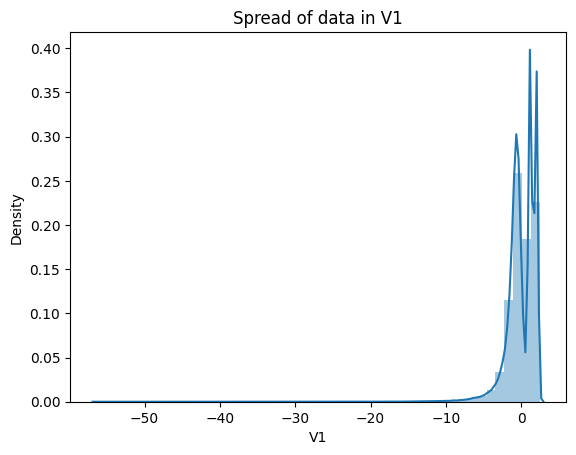

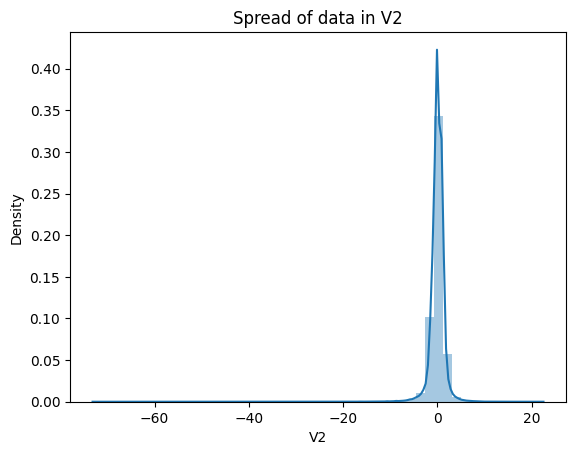

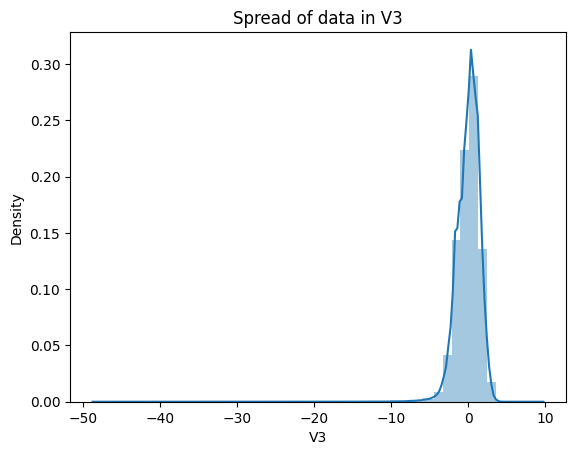

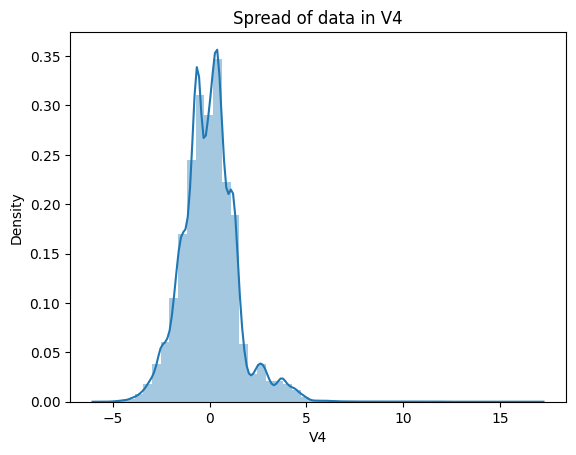

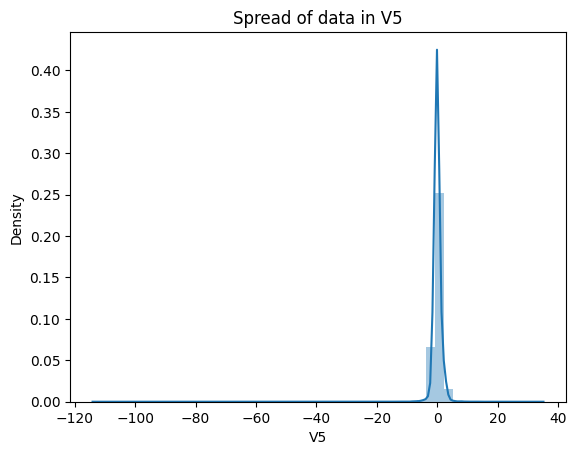

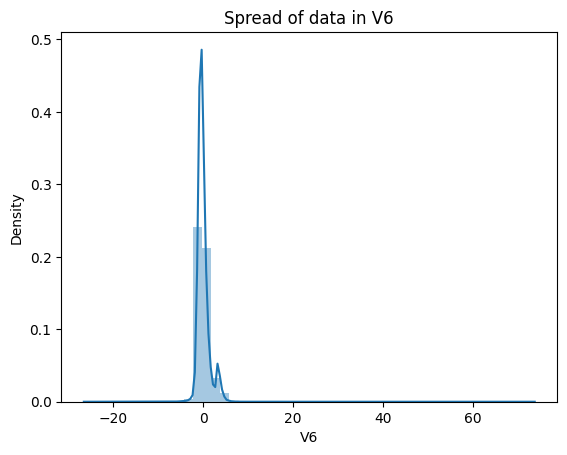

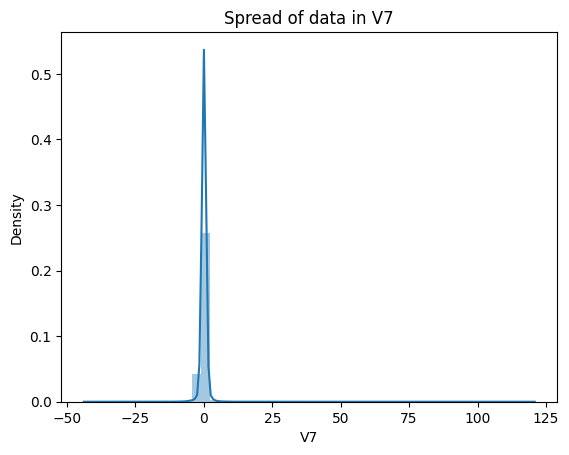

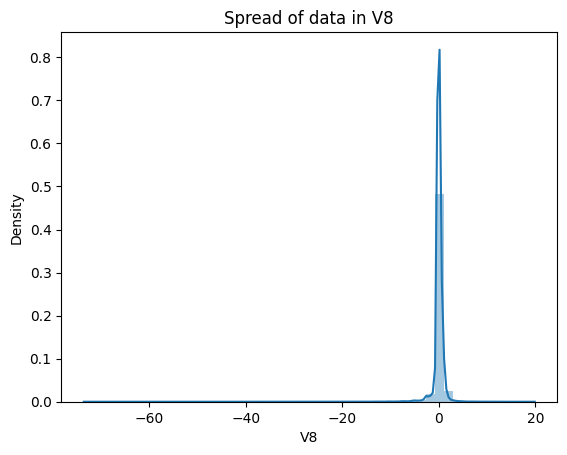

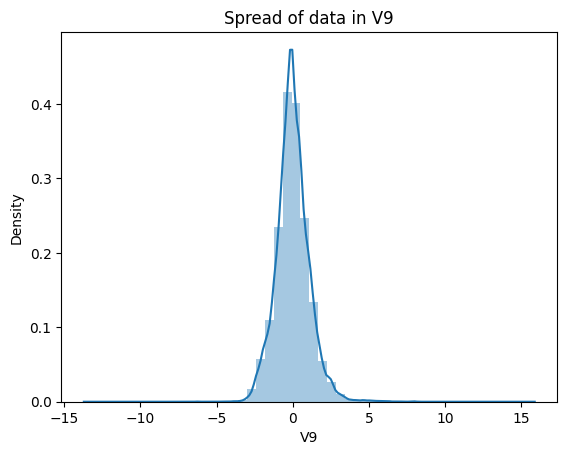

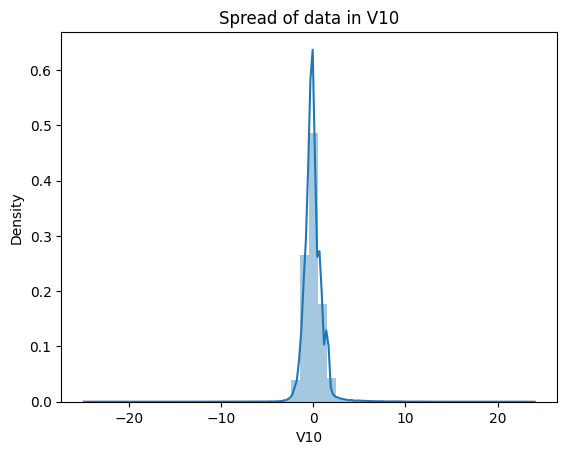

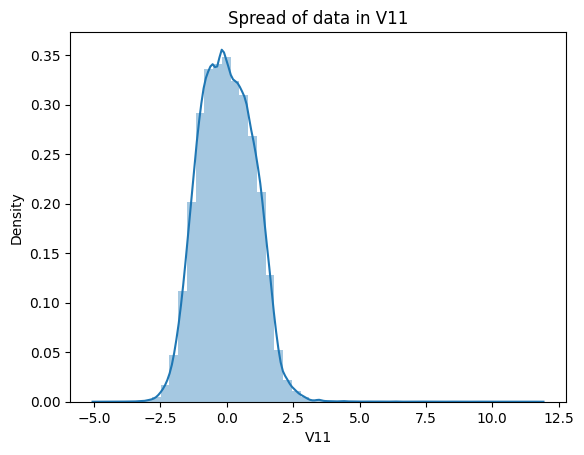

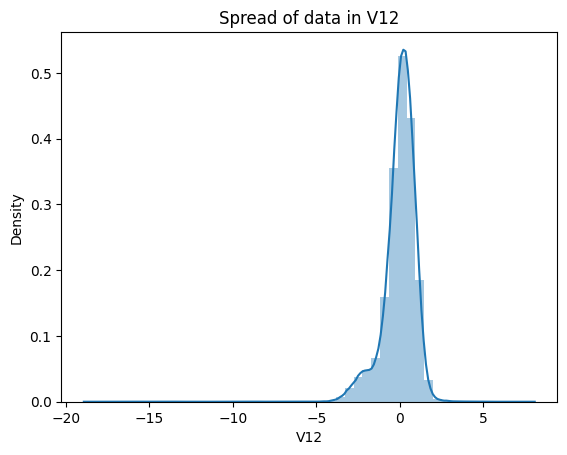

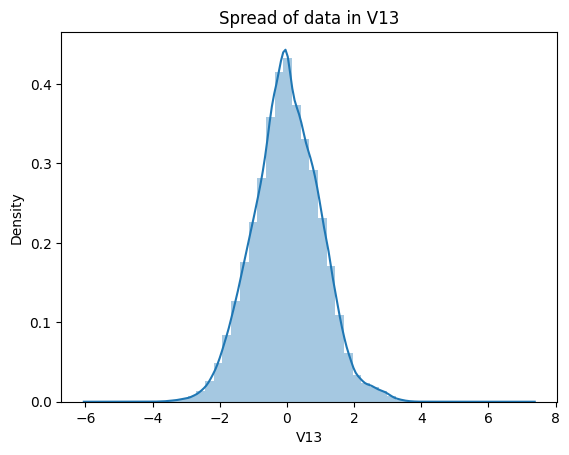

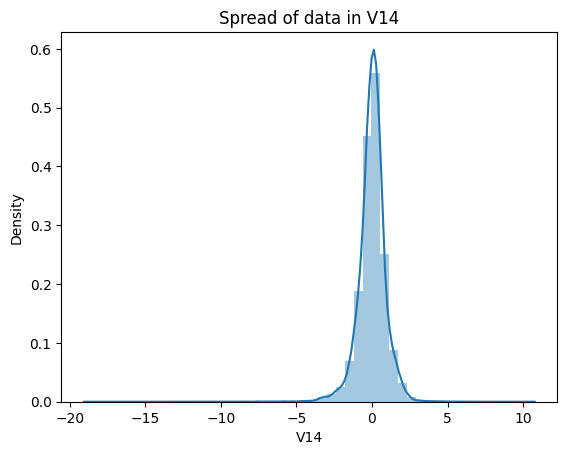

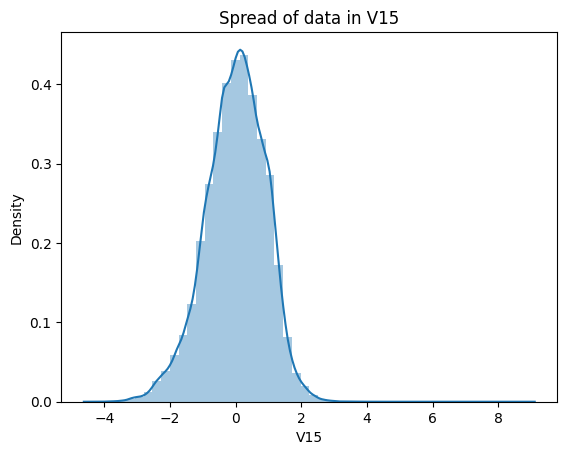

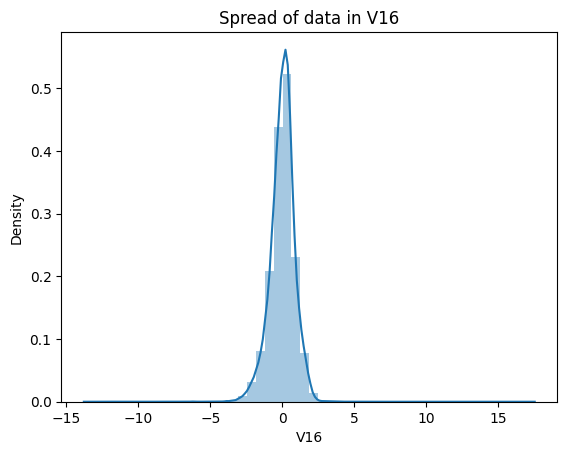

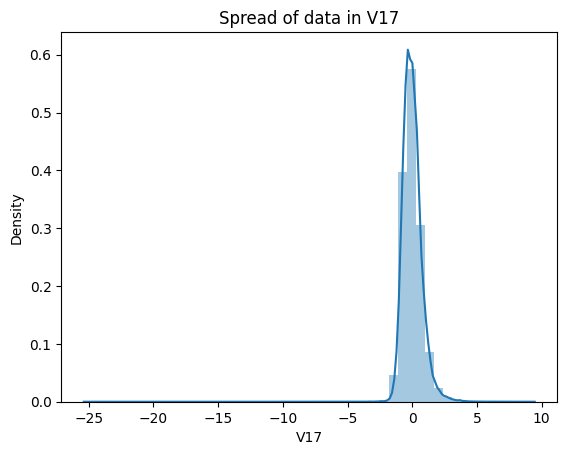

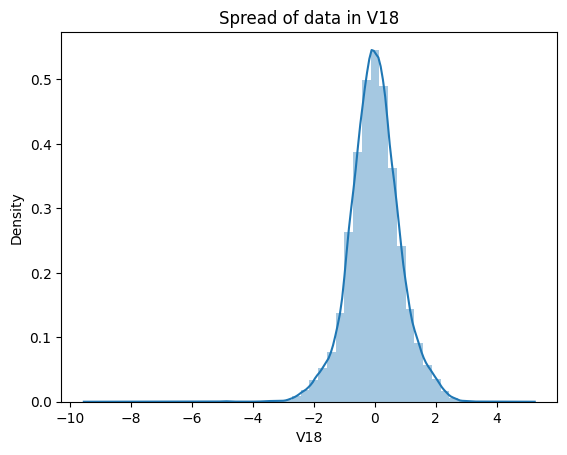

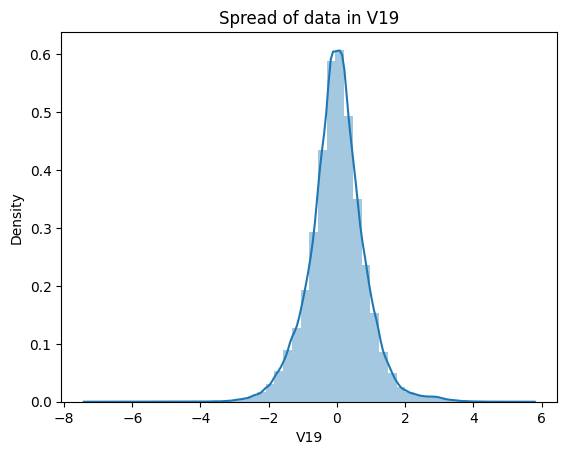

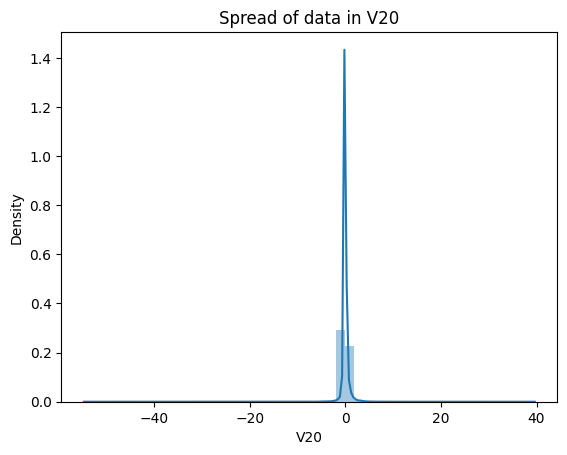

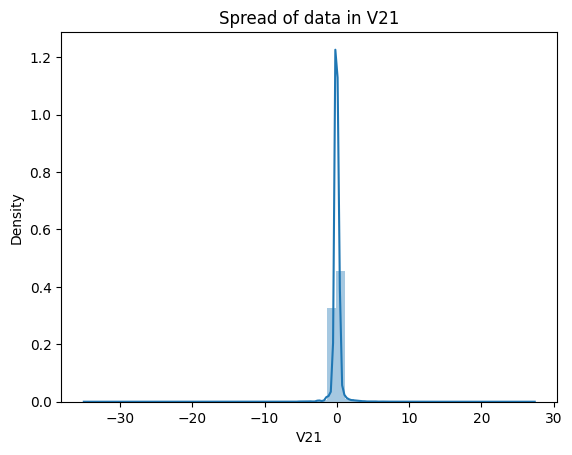

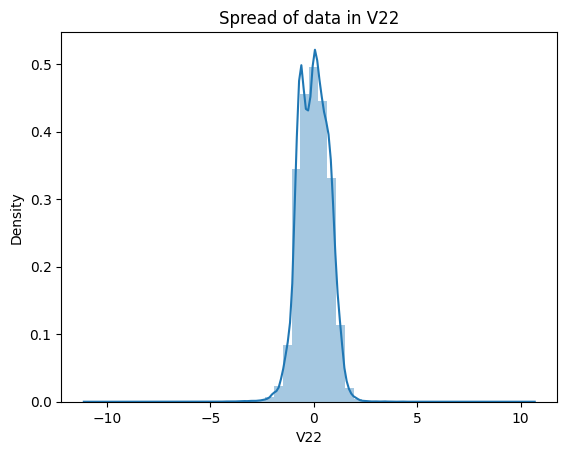

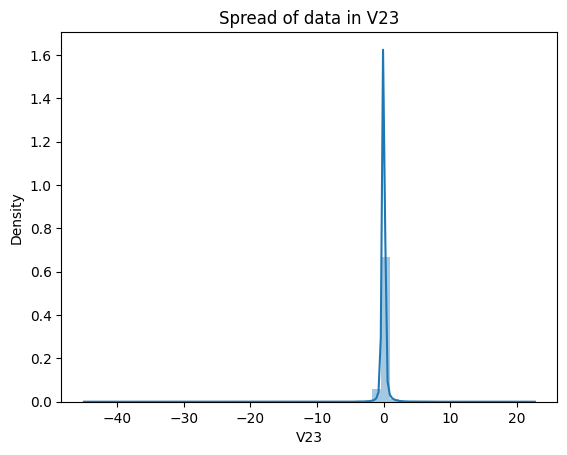

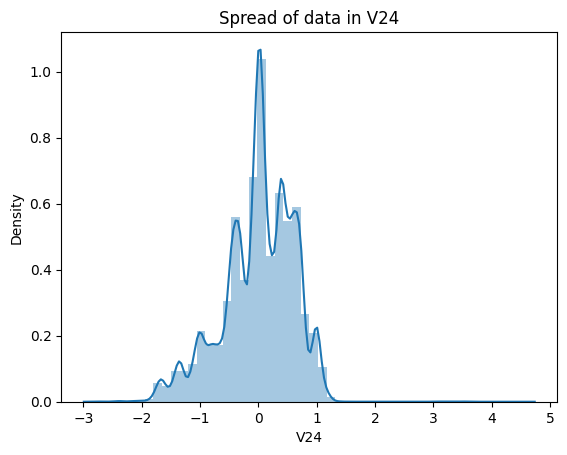

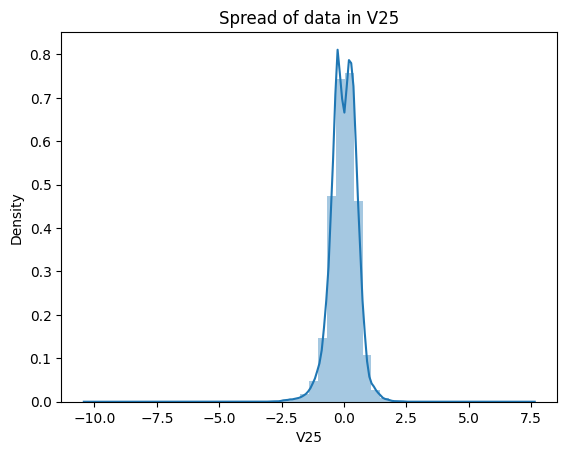

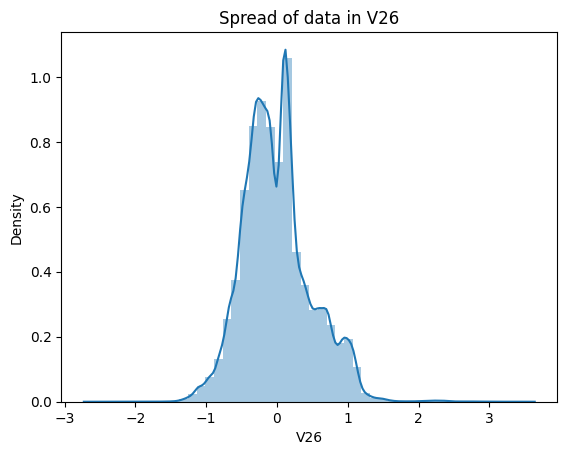

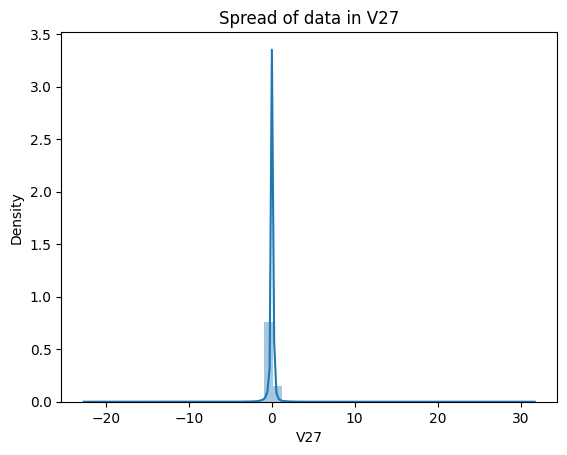

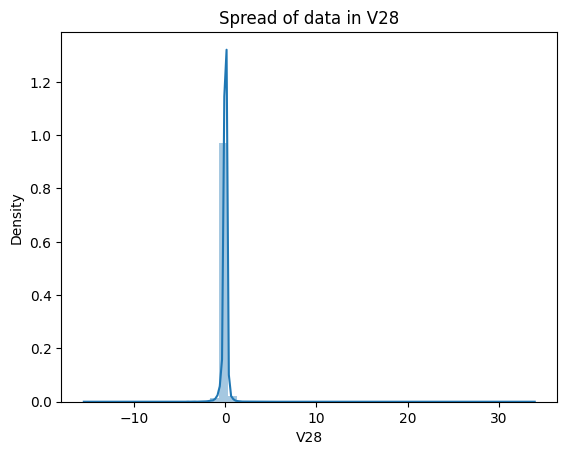

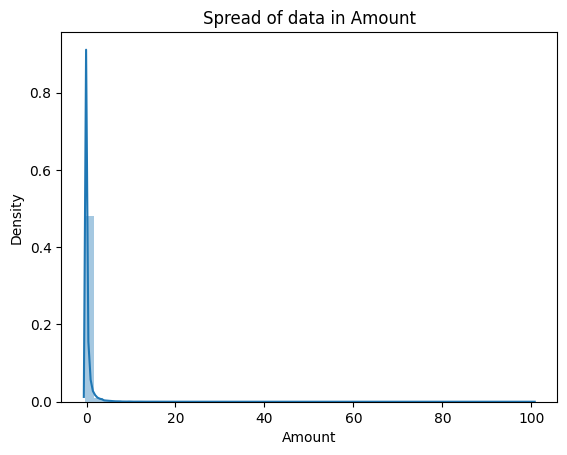

In [30]:
#Lets check how our data is distributed
for i in df.columns:
    if i != 'Class':
        sns.distplot(X_train[i],kde = True)
        plt.title('Spread of data in'+' '+ i)
        plt.xlabel(i)
        plt.show()


We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [31]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[X_train.columns] = pt.fit_transform(X_train)


In [32]:
# Transform the test set
X_test[X_train.columns] = pt.transform(X_test)


### Plotting the histogram of a variable from the dataset again to see the result

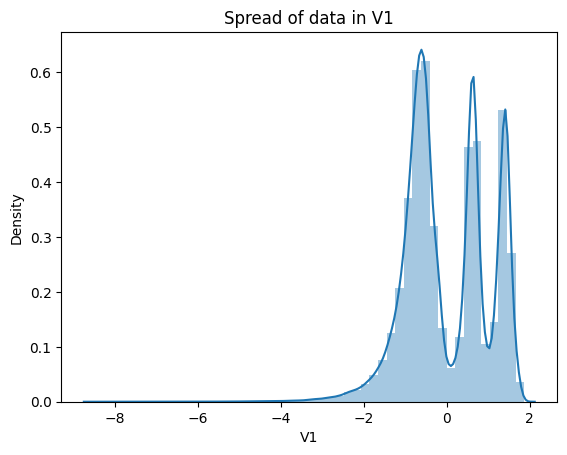

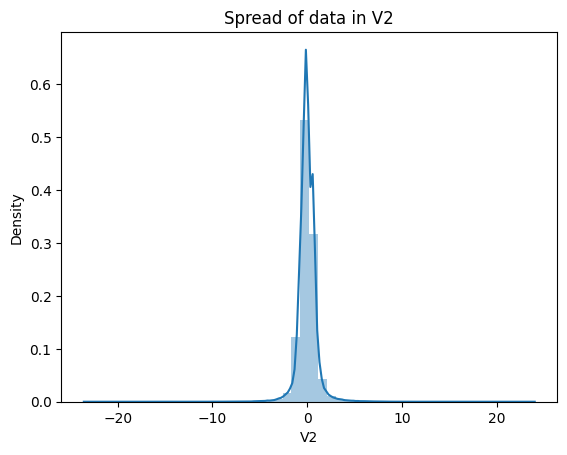

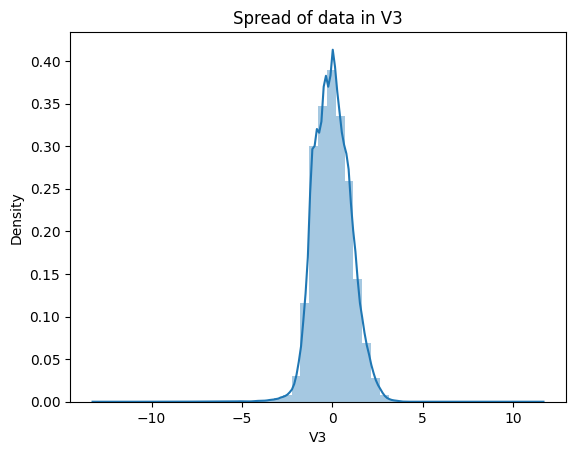

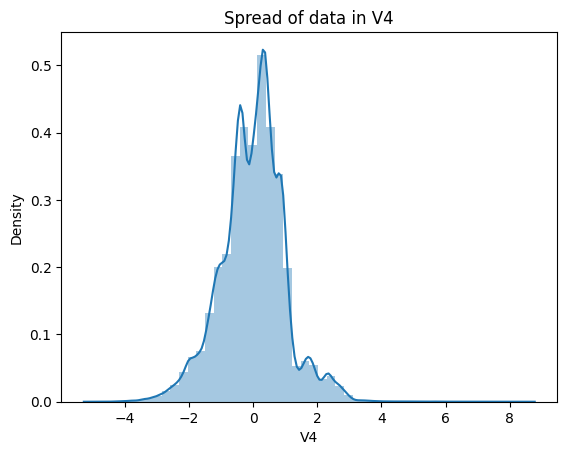

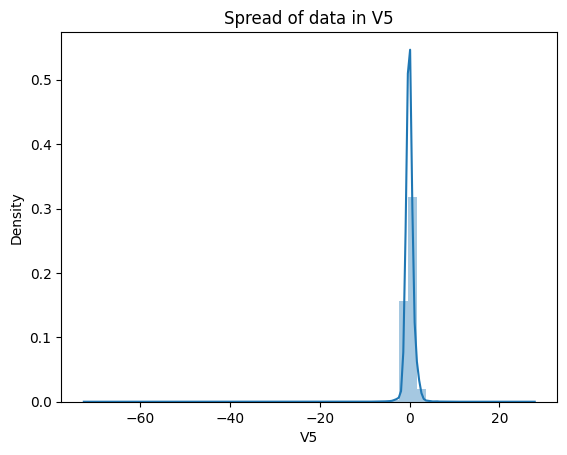

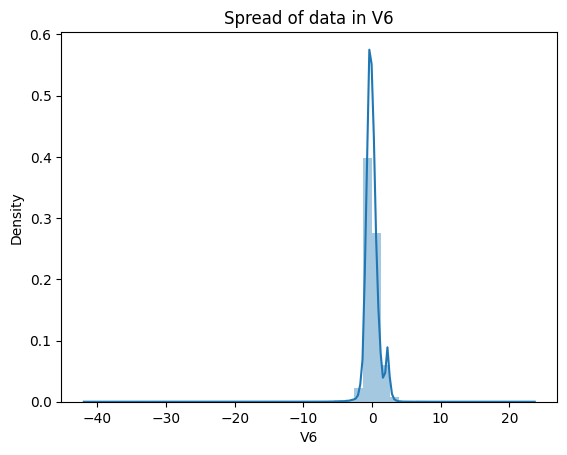

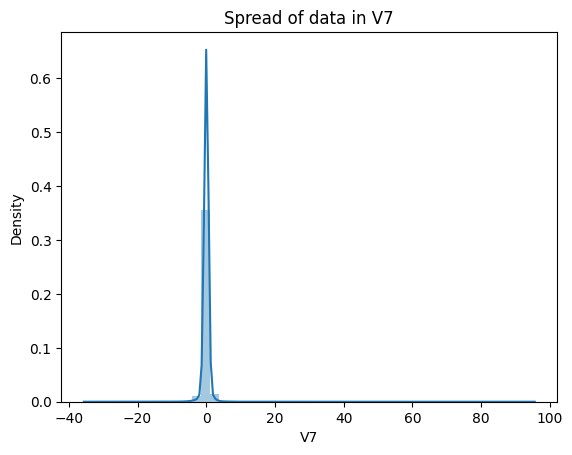

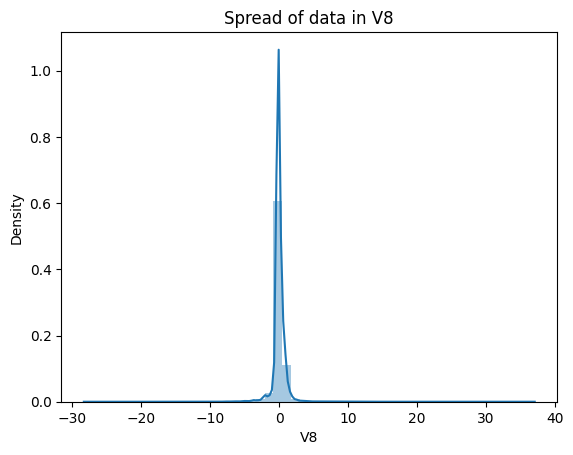

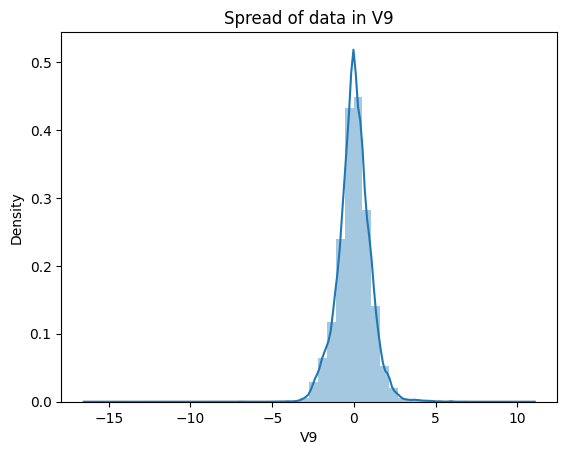

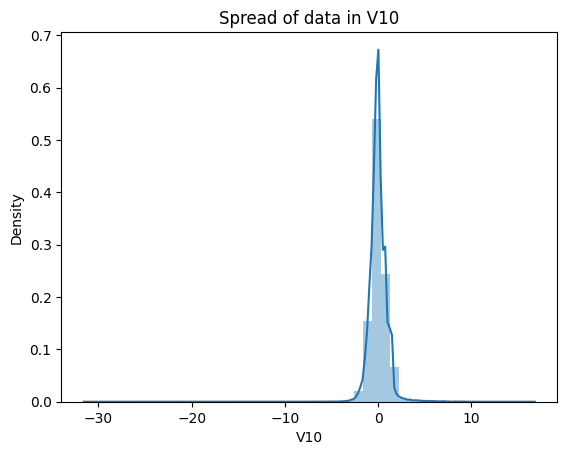

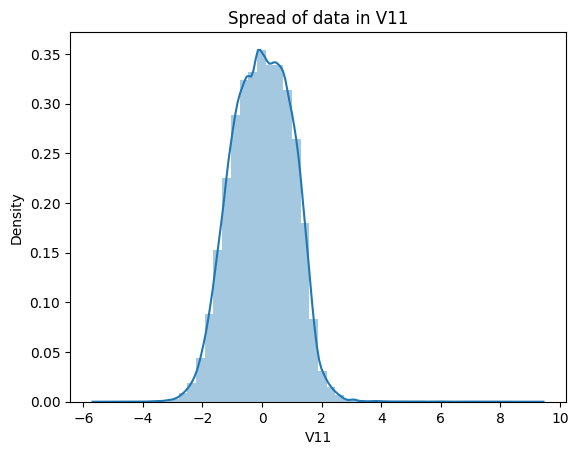

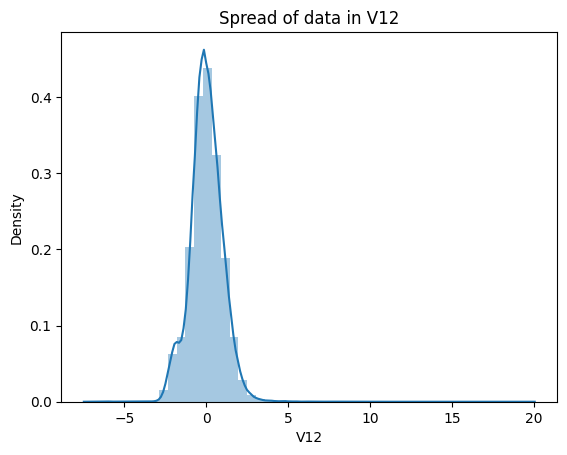

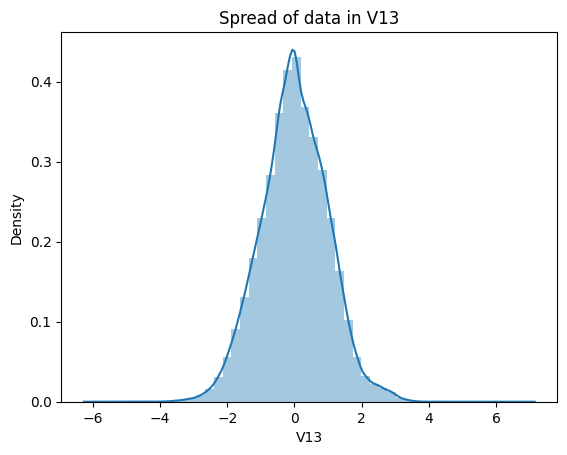

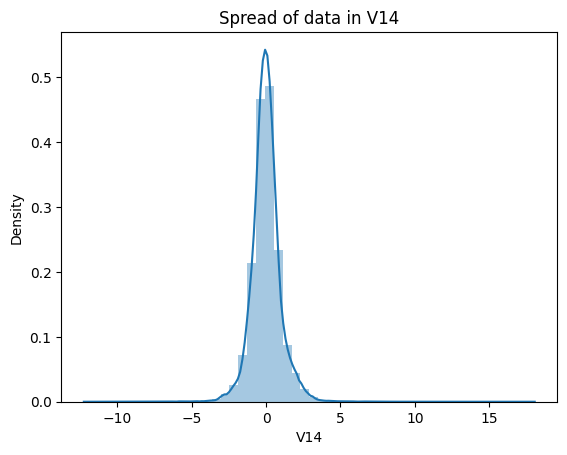

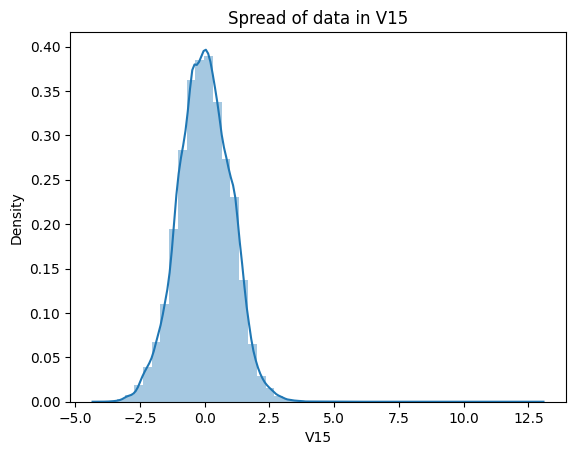

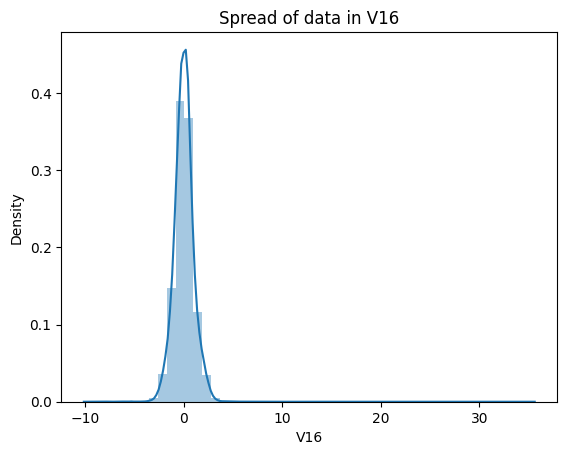

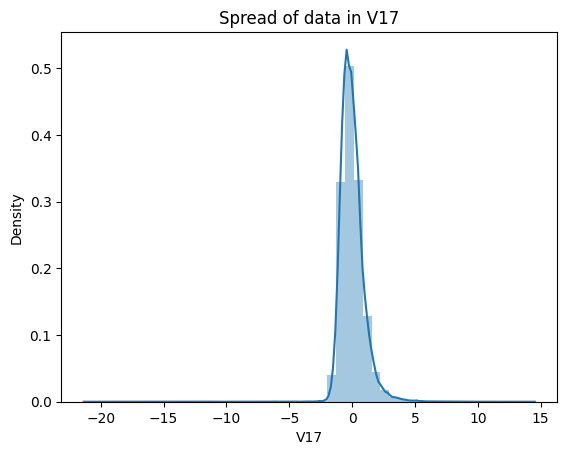

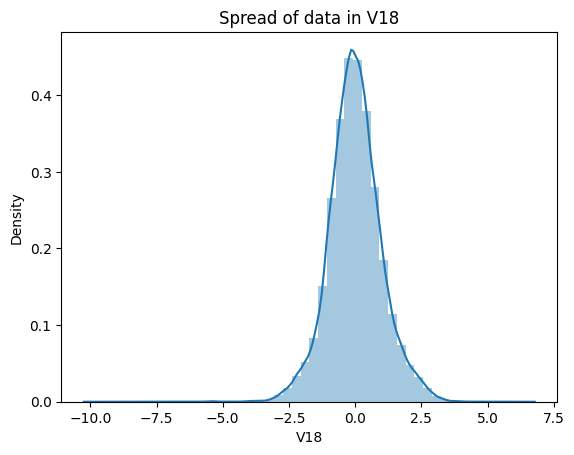

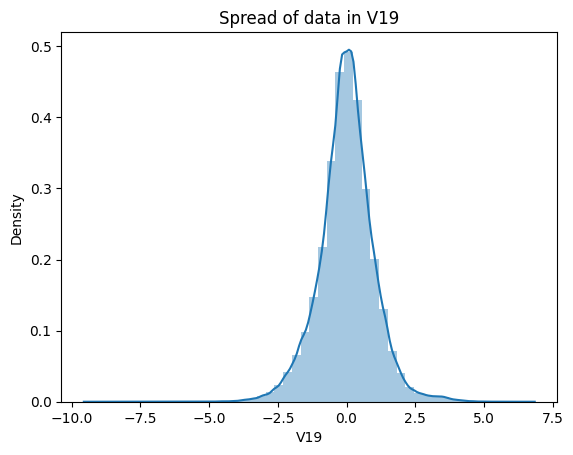

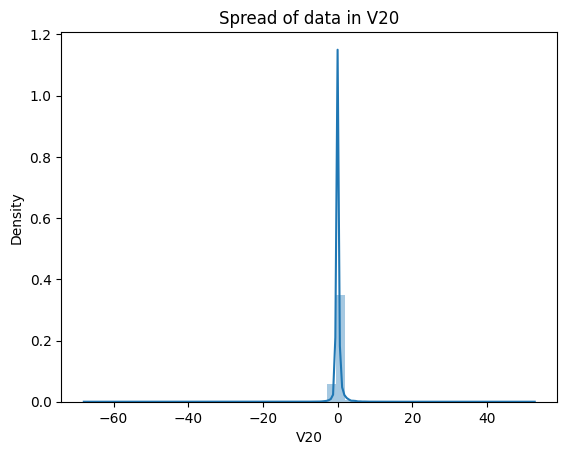

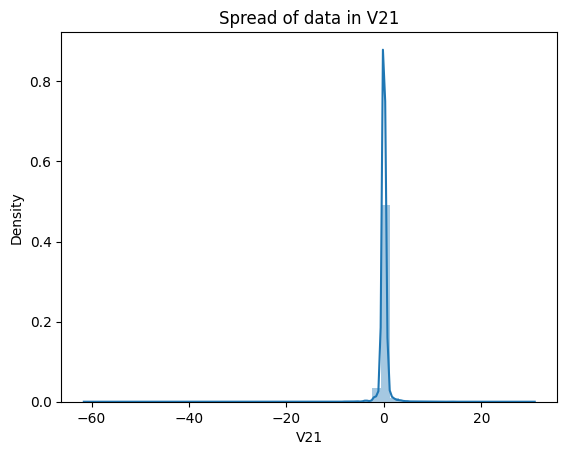

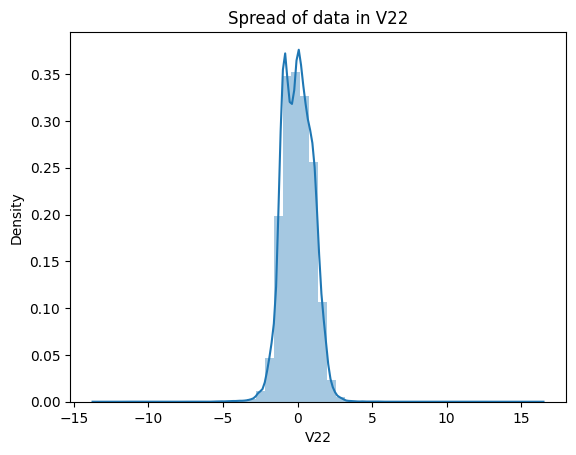

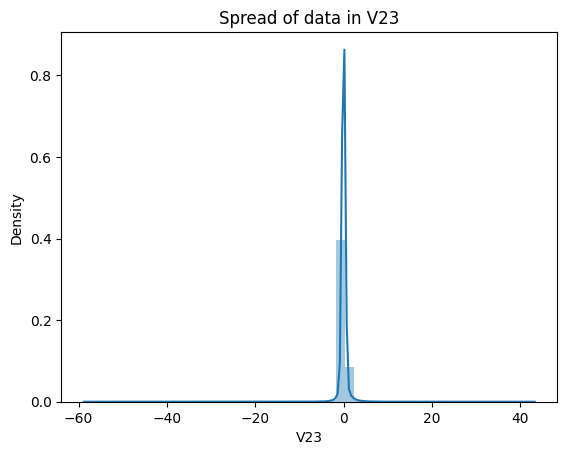

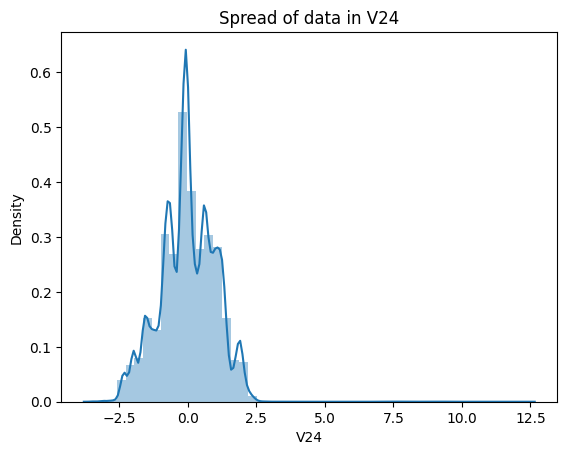

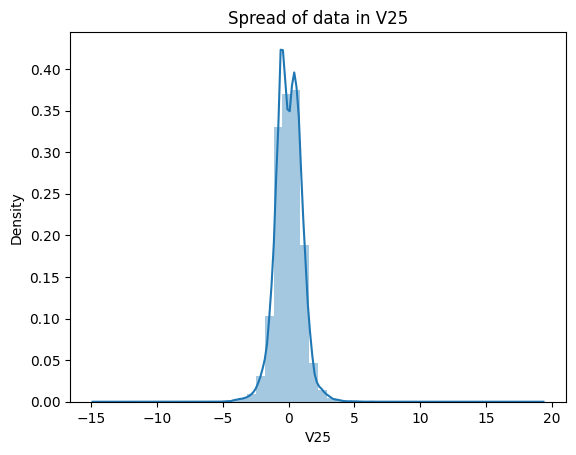

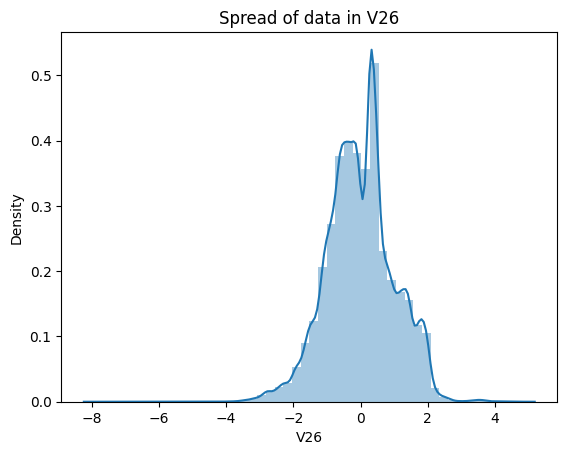

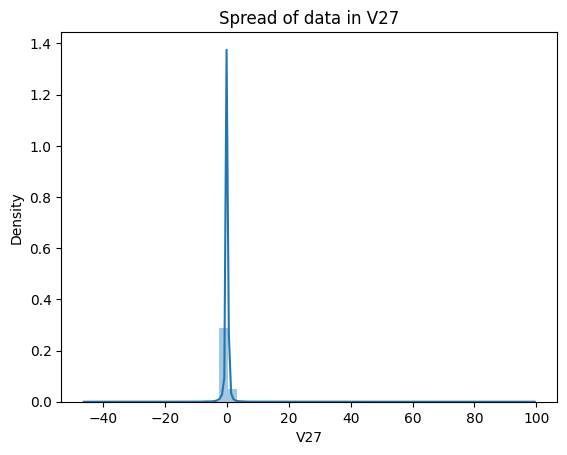

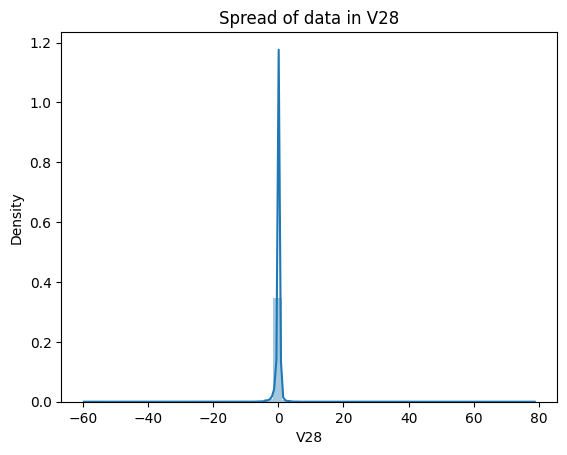

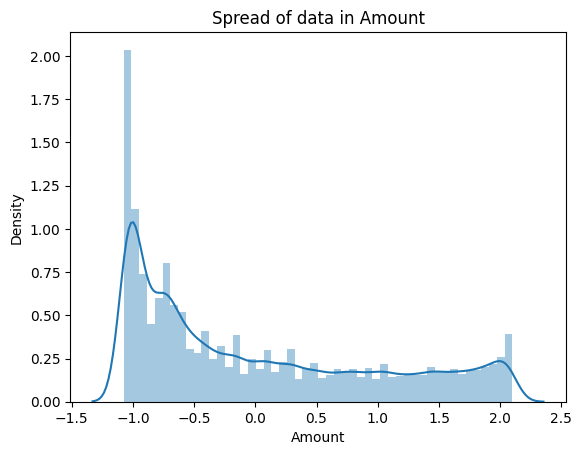

In [33]:
#Lets check how our data is distributed
for i in df.columns:
    if i != 'Class':
        sns.distplot(X_train[i],kde = True)
        plt.title('Spread of data in'+' '+ i)
        plt.xlabel(i)
        plt.show()


## **Model building on imbalanced data**

Metric selection for heavily imbalanced data. Here are some Noteworthy points to be discussed.

- As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model.

- Because If the model always predicts the same class (1 or 0) for all the data points, it will result in an accuracy of more than 99%.

- Hence, we have to measure the ROC-AUC score for fair evaluation of the model.

- In other words, accuracy alone may not be a reliable performance metric when dealing with imbalanced datasets. It can be misleading, as it does not capture the model's ability to correctly identify the minority class.

- In such scenarios ROC curve is used to used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

- The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low.

- After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

**Why SVM was not tried for model building and for few cases Random Forest was not tried ?**

- In the dataset we have 284,807 datapoints and in the case of Oversampling we would have even more number of data points.
- SVM is not very efficient with large number of data points beacuse it takes lot of computational power and resources to make the transformation.
- When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming.
- Hence, because of the unavailablity of the required resources and time, SVM was not tried.

**Why KNN was not used for model building?**

- KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points.
- It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

# **Logistic Regression**

In [34]:
# importing the logistic regression module
from sklearn.linear_model import LogisticRegression

In [35]:
# importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Tuning hyperparameter C**

- Regularization is a technique used to prevent overfitting in machine learning models. It adds a penalty term to the loss function, discouraging complex models that fit the training data too closely.
- A smaller value of C corresponds to stronger regularization, meaning the model will be more constrained and have simpler decision boundaries. This can help prevent overfitting but may lead to underfitting if set too low.
- On the other hand, a larger value of C reduces the strength of regularization, allowing the model to fit the training data more closely.
- This can potentially improve performance on the training set, but it may also increase the risk of overfitting.

In [36]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [37]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=1, shuffle=True)

# specify params
params = {'C': [0.001,0.10, 0.1, 10,25,50, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring ='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)


In [38]:
# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [39]:
# results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.087340      0.210335         0.063489        0.021364   0.001   
1       1.126723      0.040182         0.025728        0.001502     0.1   
2       1.392115      0.361861         0.035479        0.013086     0.1   
3       1.194807      0.155611         0.024828        0.000116      10   
4       1.487152      0.399094         0.036007        0.013536      25   
5       1.161227      0.034695         0.024716        0.000181      50   
6       1.500802      0.309277         0.036285        0.014122     100   
7       1.159726      0.030139         0.024835        0.000116    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.975378           0.994538           0.980412   
1    {'C': 0.1}           0.973838           0.994077           0.982737   
2    {'C': 0.1}           0.973838           0.994077           0.982737   
3     {'C': 10}           0.972961           0.993282           0.982034   
4     {'C': 25}           0.972956           0.993276           0.982031   
5     {'C': 50}           0.972955           0.993275           0.982030   
6    {'C': 100}           0.972954           0.993274           0.982030   
7   {'C': 1000}           0.972953           0.993274           0.982030   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.969908  ...         0.980644        0.008265                8   
1           0.975949  ...         0.982003        0.007094                1   
2           0.975949  ...         0.982003        0.007094                1   
3           0.974822  ...         0.981243        0.007196                3   
4           0.974813  ...         0.981238        0.007196                4   
5           0.974811  ...         0.981237        0.007197                5   
6           0.974809  ...         0.981236        0.007197                6   
7           0.974809  ...         0.981236        0.007197                7   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.982761            0.978699            0.982325   
1            0.984755            0.980906            0.983543   
2            0.984755            0.980906            0.983543   
3            0.983857            0.980245            0.982495   
4            0.983850            0.980240            0.982488   
5            0.983848            0.980239            0.982485   
6            0.983847            0.980238            0.982483   
7            0.983846            0.980237            0.982482   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.983973            0.980446          0.981641         0.001857  
1            0.985030            0.984949          0.983837         0.001561  
2            0.985030            0.984949          0.983837         0.001561  
3            0.984536            0.984388          0.983104         0.001601  
4            0.984532            0.984384          0.983099         0.001601  
5            0.984531            0.984382          0.983097         0.001601  
6            0.984530            0.984382          0.983096         0.001601  
7            0.984530            0.984381          0.983095         0.001601  

[8 rows x 21 columns]

In [40]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]


params  mean_test_score  std_test_score  rank_test_score  \
0  {'C': 0.001}         0.980644        0.008265                8   
1    {'C': 0.1}         0.982003        0.007094                1   
2    {'C': 0.1}         0.982003        0.007094                1   
3     {'C': 10}         0.981243        0.007196                3   
4     {'C': 25}         0.981238        0.007196                4   
5     {'C': 50}         0.981237        0.007197                5   
6    {'C': 100}         0.981236        0.007197                6   
7   {'C': 1000}         0.981236        0.007197                7   

   mean_fit_time  mean_score_time  mean_train_score  
0       1.087340         0.063489          0.981641  
1       1.126723         0.025728          0.983837  
2       1.392115         0.035479          0.983837  
3       1.194807         0.024828          0.983104  
4       1.487152         0.036007          0.983099  
5       1.161227         0.024716          0.983097  
6       1.500802         0.036285          0.983096  
7       1.159726         0.024835          0.983095

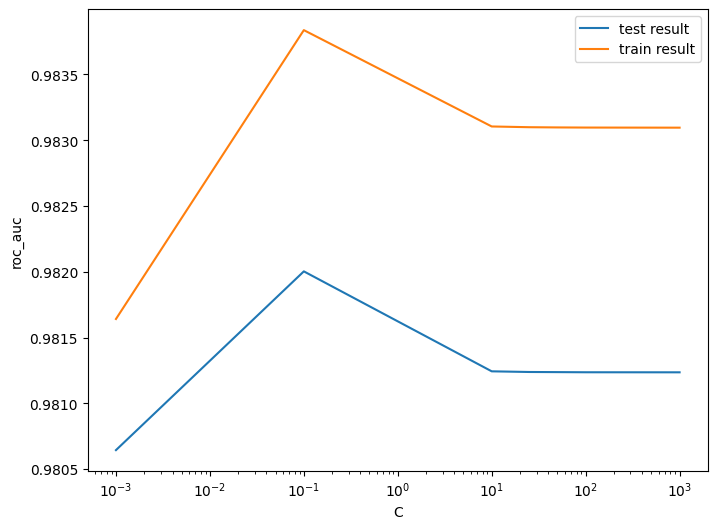

In [41]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')


In [42]:
# best score
best_score = model_cv.best_score_
best_score


0.9820029136512998

In [43]:
# best params
best_params = model_cv.best_params_['C']
best_params


0.1

In [44]:
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")


Best Score: 0.9820029136512998
Best Params: 0.1


**Logistic regression with optimal C**

In [45]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.1)


In [46]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)


**Prediction on train dataset**

In [47]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [48]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix


array([[227420,     29],
       [   119,    277]])

In [49]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive


In [50]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))


Accuracy: 0.9993504356031513
Sensitivity: 0.6994949494949495
Specificity: 0.9998724988898611
F1-score: 0.7891737891737892


In [51]:
# classification_report
print(classification_report(y_train, y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [52]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [53]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
y_train_pred_proba


array([4.62063612e-05, 1.36014914e-04, 1.00910739e-04, ...,
       5.54425085e-04, 4.71457743e-04, 6.87455183e-04])

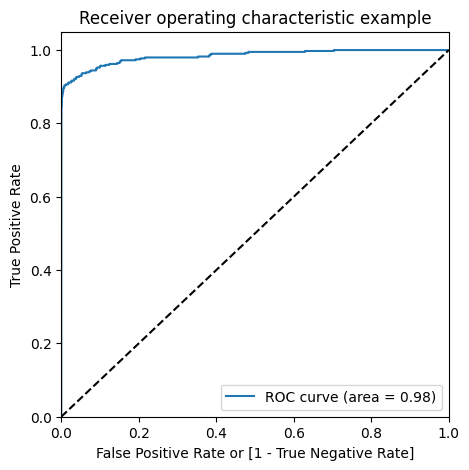

In [55]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


We acheived very good ROC 0.99 on the train set.



**Prediction on Test dataset**

In [56]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)


In [57]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56849    17]
 [   39    57]]


In [58]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [59]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))


Accuracy:- 0.9990168884519505
Sensitivity:- 0.59375
Specificity:- 0.9997010515949777
F1-Score:- 0.6705882352941177


In [60]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [61]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]


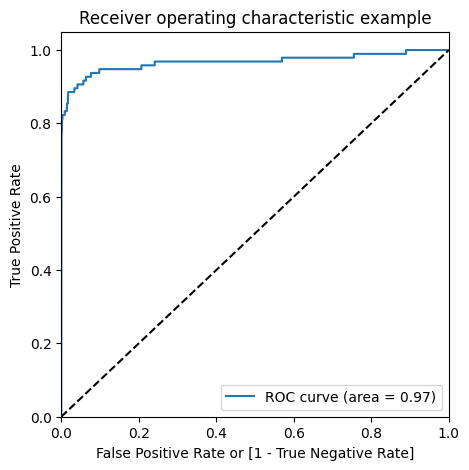

In [62]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set i.e. 0.97

#### **Model summary (*Logistic Regression*)**

**Train set**

Accuracy = 0.99

Sensitivity = 0.69

Specificity = 0.99

F1-Score = 0.78

ROC = 0.98

**Test set**

Accuracy = 0.99

Sensitivity = 0.59

Specificity = 0.99

F1-Score = 0.67

ROC = 0.97

Overall, the model is performing well in the test set



### **XGBOOST**

In [63]:
# Importing XGBoost
from xgboost import XGBClassifier


In [78]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.3],
               'subsample': [0.6, 0.7, 0.8]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.6, 0.7, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.904030      0.867110         0.165832        0.059369   
1       3.913920      1.144144         0.134164        0.005598   
2       3.971520      1.281973         0.123482        0.000782   
3       4.898726      1.194893         0.196223        0.089119   
4       4.697074      2.038360         0.125665        0.001620   
5       4.218894      1.490475         0.125461        0.003779   
6       4.233066      1.251555         0.129399        0.003088   
7       4.089283      1.125497         0.127852        0.001231   
8       4.066537      1.154338         0.134229        0.007249   

  param_learning_rate param_subsample  \
0                 0.1             0.6   
1                 0.1             0.7   
2                 0.1             0.8   
3                 0.2             0.6   
4                 0.2             0.7   
5                 0.2             0.8   
6                 0.3             0.6   
7                 0.3             0.7   
8                 0.3             0.8   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.6}           0.975173   
1  {'learning_rate': 0.1, 'subsample': 0.7}           0.977636   
2  {'learning_rate': 0.1, 'subsample': 0.8}           0.981207   
3  {'learning_rate': 0.2, 'subsample': 0.6}           0.972484   
4  {'learning_rate': 0.2, 'subsample': 0.7}           0.973360   
5  {'learning_rate': 0.2, 'subsample': 0.8}           0.973987   
6  {'learning_rate': 0.3, 'subsample': 0.6}           0.975898   
7  {'learning_rate': 0.3, 'subsample': 0.7}           0.976140   
8  {'learning_rate': 0.3, 'subsample': 0.8}           0.980379   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.976407           0.981228         0.977603        0.002612   
1           0.973898           0.980331         0.977288        0.002638   
2           0.975370           0.982084         0.979554        0.002980   
3           0.976596           0.978129         0.975736        0.002383   
4           0.971673           0.977984         0.974339        0.002668   
5           0.974851           0.973063         0.973967        0.000730   
6           0.977398           0.977063         0.976786        0.000643   
7           0.968457           0.972262         0.972286        0.003137   
8           0.975274           0.973912         0.976522        0.002784   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.998967            0.999409   
1                3            0.998596            0.999498   
2                1            0.999039            0.999653   
3                6            0.999963            0.999952   
4                7            0.999976            0.999977   
5                8            0.999964            0.999984   
6                4            0.999999            0.999999   
7                9            0.999998            0.999999   
8                5            0.999998            0.999999   

   split2_train_score  mean_train_score  std_train_score  
0            0.998939          0.999105     2.150908e-04  
1            0.999042          0.999046     3.682925e-04  
2            0.998841          0.999178     3.457626e-04  
3            0.999955          0.999957     4.645110e-06  
4            0.999971          0.999975     2.451149e-06  
5            0.999935          0.999961     2.002080e-05  
6            0.999998          0.999999     6.174234e-07  
7            0.999998          0.999998     6.231340e-08  
8            0.999999          0.999999     3.977812e-07

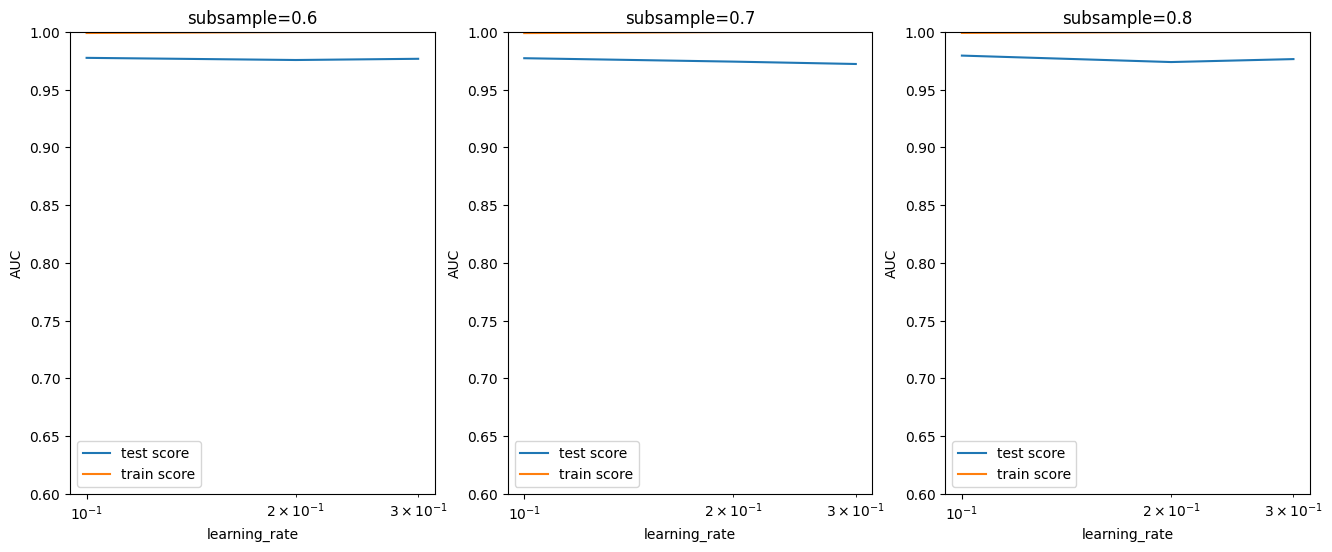

In [80]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1,0.2, 0.3],
             'subsample': [0.6, 0.7, 0.8]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')


In [81]:
model_cv.best_params_


{'learning_rate': 0.1, 'subsample': 0.8}

In [82]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.1,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.8,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.8}, ...)

**Prediction on train dataset**

In [83]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)


In [84]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[227449      0]
 [     0    396]]


In [85]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [86]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [87]:
# classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [88]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]


In [89]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc


1.0

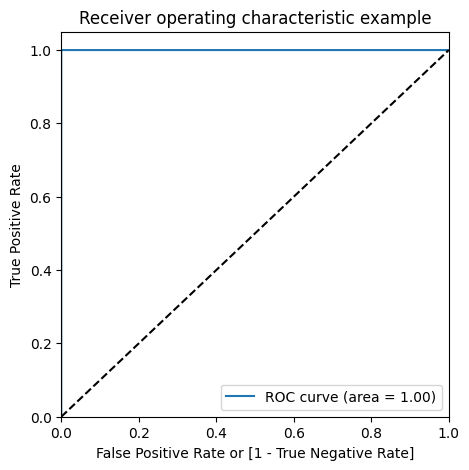

In [90]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)


**Prediction on test dataset**

In [91]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)


In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56858     8]
 [   25    71]]


In [93]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [94]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))


Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714


In [95]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [96]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]


In [97]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9723599118981465

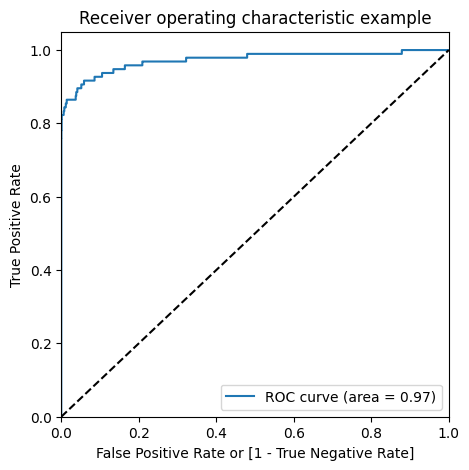

In [98]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set i.e. 0.97

#### **Model summary (XGBOOST)**

**Train set**

Accuracy = 1

Sensitivity = 1

Specificity = 1

F1-Score = 1

ROC = 1

**Test set**

Accuracy = 0.99

Sensitivity = 0.73

Specificity = 0.99

F1-Score = 0.81

ROC = 0.97

Overall, the model is performing well in the test set



### **DECISION TREE**

In [99]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [101]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(25, 100, 25),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(25, 100, 25)},
             scoring='roc_auc', verbose=1)

In [102]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.365100      0.319794         0.027774        0.007015   
1        4.341644      0.579976         0.022905        0.000081   
2        4.265230      0.454706         0.027072        0.005988   
3        4.170018      0.188906         0.027913        0.005527   
4        4.146728      0.337040         0.022661        0.000428   
5        4.371388      0.637332         0.022682        0.000694   
6        4.305640      0.449017         0.027145        0.005940   
7        4.302838      0.290277         0.027327        0.006234   
8        4.324679      0.551017         0.027605        0.005632   
9        8.604140      0.467783         0.029540        0.006535   
10       8.444019      0.439241         0.033135        0.005894   
11       8.219976      0.513162         0.024264        0.000259   
12       8.508555      0.300532         0.029157        0.007082   
13       8.489735      0.581502         0.027291        0.003674   
14       8.495904      0.362360         0.029958        0.006190   
15       8.093145      0.548191         0.030198        0.007687   
16       8.471662      0.371469         0.029822        0.007547   
17       8.534133      0.602206         0.024949        0.000190   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                5                     25                      25   
1                5                     25                      50   
2                5                     25                      75   
3                5                     50                      25   
4                5                     50                      50   
5                5                     50                      75   
6                5                     75                      25   
7                5                     75                      50   
8                5                     75                      75   
9               10                     25                      25   
10              10                     25                      50   
11              10                     25                      75   
12              10                     50                      25   
13              10                     50                      50   
14              10                     50                      75   
15              10                     75                      25   
16              10                     75                      50   
17              10                     75                      75   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.933527   
1   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.933533   
2   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.933472   
3   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
4   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
5   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
6   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.933320   
7   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.933316   
8   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.933316   
9   {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925421   
10  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925432   
11  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925354   
12  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.917551   
13  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.917518   
14  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.917493   
15  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.932078   
16  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.932108   
17  {'max_depth': 10, 'min_samp

In [103]:
grid_search.best_score_


0.9370233609953287

In [104]:
print(grid_search.best_estimator_)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=75, min_samples_split=75)


In [122]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=75,
                                  min_samples_split=75)

dt_imb_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=75, min_samples_split=75,
                       random_state=100)

**Prediction on train dataset**


In [123]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)


In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[227415     34]
 [   151    245]]


In [125]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 0.999188044503939
Sensitivity:- 0.6186868686868687
Specificity:- 0.9998505159398371
F1-Score:- 0.725925925925926


In [127]:
# classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.88      0.62      0.73       396

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [128]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]


In [129]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc


0.9534667300930287

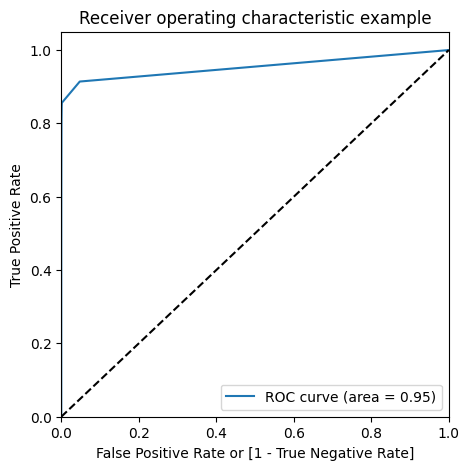

In [130]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


**Prediction on Test dataset**

In [131]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)


In [132]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56845    21]
 [   51    45]]


In [133]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [134]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 0.998735999438222
Sensitivity:- 0.46875
Specificity:- 0.999630710793796
F1-Score:- 0.725925925925926


In [135]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.47      0.56        96

    accuracy                           1.00     56962
   macro avg       0.84      0.73      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [136]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]


In [137]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9217337688601273

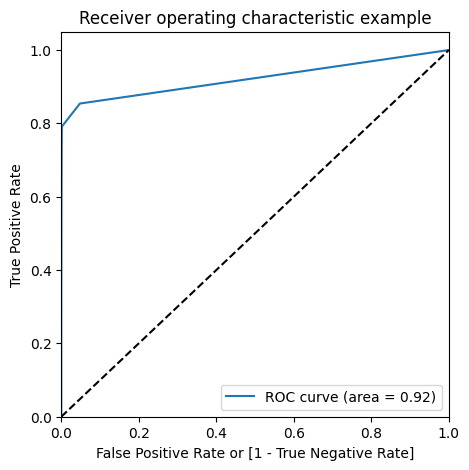

In [138]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set i.e. 0.97

#### **Model summary (Decision Tree)**

**Train set**

Accuracy = 0.99

Sensitivity = 0.61

Specificity = 0.99

F1-Score = 0.72

ROC = 0.95

**Test set**

Accuracy = 0.99

Sensitivity = 0.46

Specificity = 0.99

F1-Score = 0.72

ROC = 0.92




### **Random Forest**

In [139]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [140]:
#param_grid = {
    #'max_depth': range(5,10,5) ,
    #'min_samples_leaf': [50, 100],
    #'min_samples_split': [50, 100],
    #'n_estimators': [100,200],
    #'max_features': [10, 20]
#}
# Create a based model
#rf = RandomForestClassifier()

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf,
                           #param_grid = param_grid,
                           #cv = 2,
                           #n_jobs = -1,
                           #verbose = 1,
                           #return_train_score=True)

# Fit the model
#grid_search.fit(X_train, y_train)


In [141]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        max_features = 10,
                                        min_samples_leaf = 50,
                                        min_samples_split = 100,
                                        n_estimators = 200)


In [142]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

**Prediction on train dataset**

In [143]:
# predictions on train test
y_train_pred = rfc_imb_model.predict(X_train)

In [144]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[227407     42]
 [   103    293]]


In [145]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [146]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 0.9993636024490333
Sensitivity:- 0.73989898989899
Specificity:- 0.9998153432197987
F1-Score:- 0.8016415868673051


In [147]:
# classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.87      0.74      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [148]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]


In [149]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc


0.9801677374583829

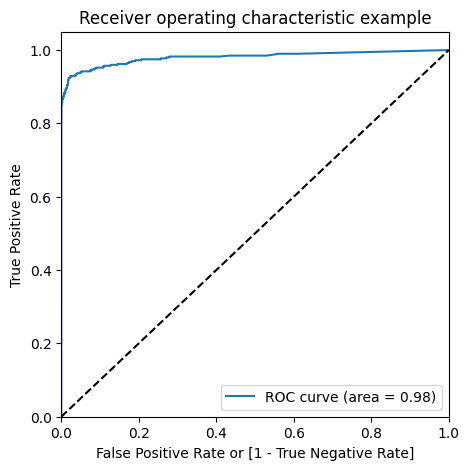

In [150]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


**Prediction on test dataset**

In [151]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)


In [152]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)



[[56843    23]
 [   37    59]]


In [153]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


Accuracy:- 0.9989466661985184
Sensitivity:- 0.6145833333333334
Specificity:- 0.9995955403932051
F1-Score:- 0.8016415868673051


In [155]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.61      0.66        96

    accuracy                           1.00     56962
   macro avg       0.86      0.81      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [156]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]


In [157]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.965764637481096

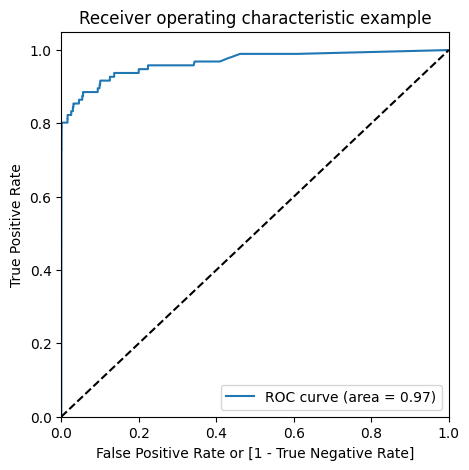

In [158]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (Random Forest)**

**Train set**

Accuracy = 0.99

Sensitivity = 0.73

Specificity = 0.99

F1-Score = 0.80

ROC = 0.98

**Test set**

Accuracy = 0.99

Sensitivity = 0.61

Specificity = 0.99

F1-Score = 0.80

ROC = 0.97



Top var = 14
2nd Top var = 7
3rd Top var = 10


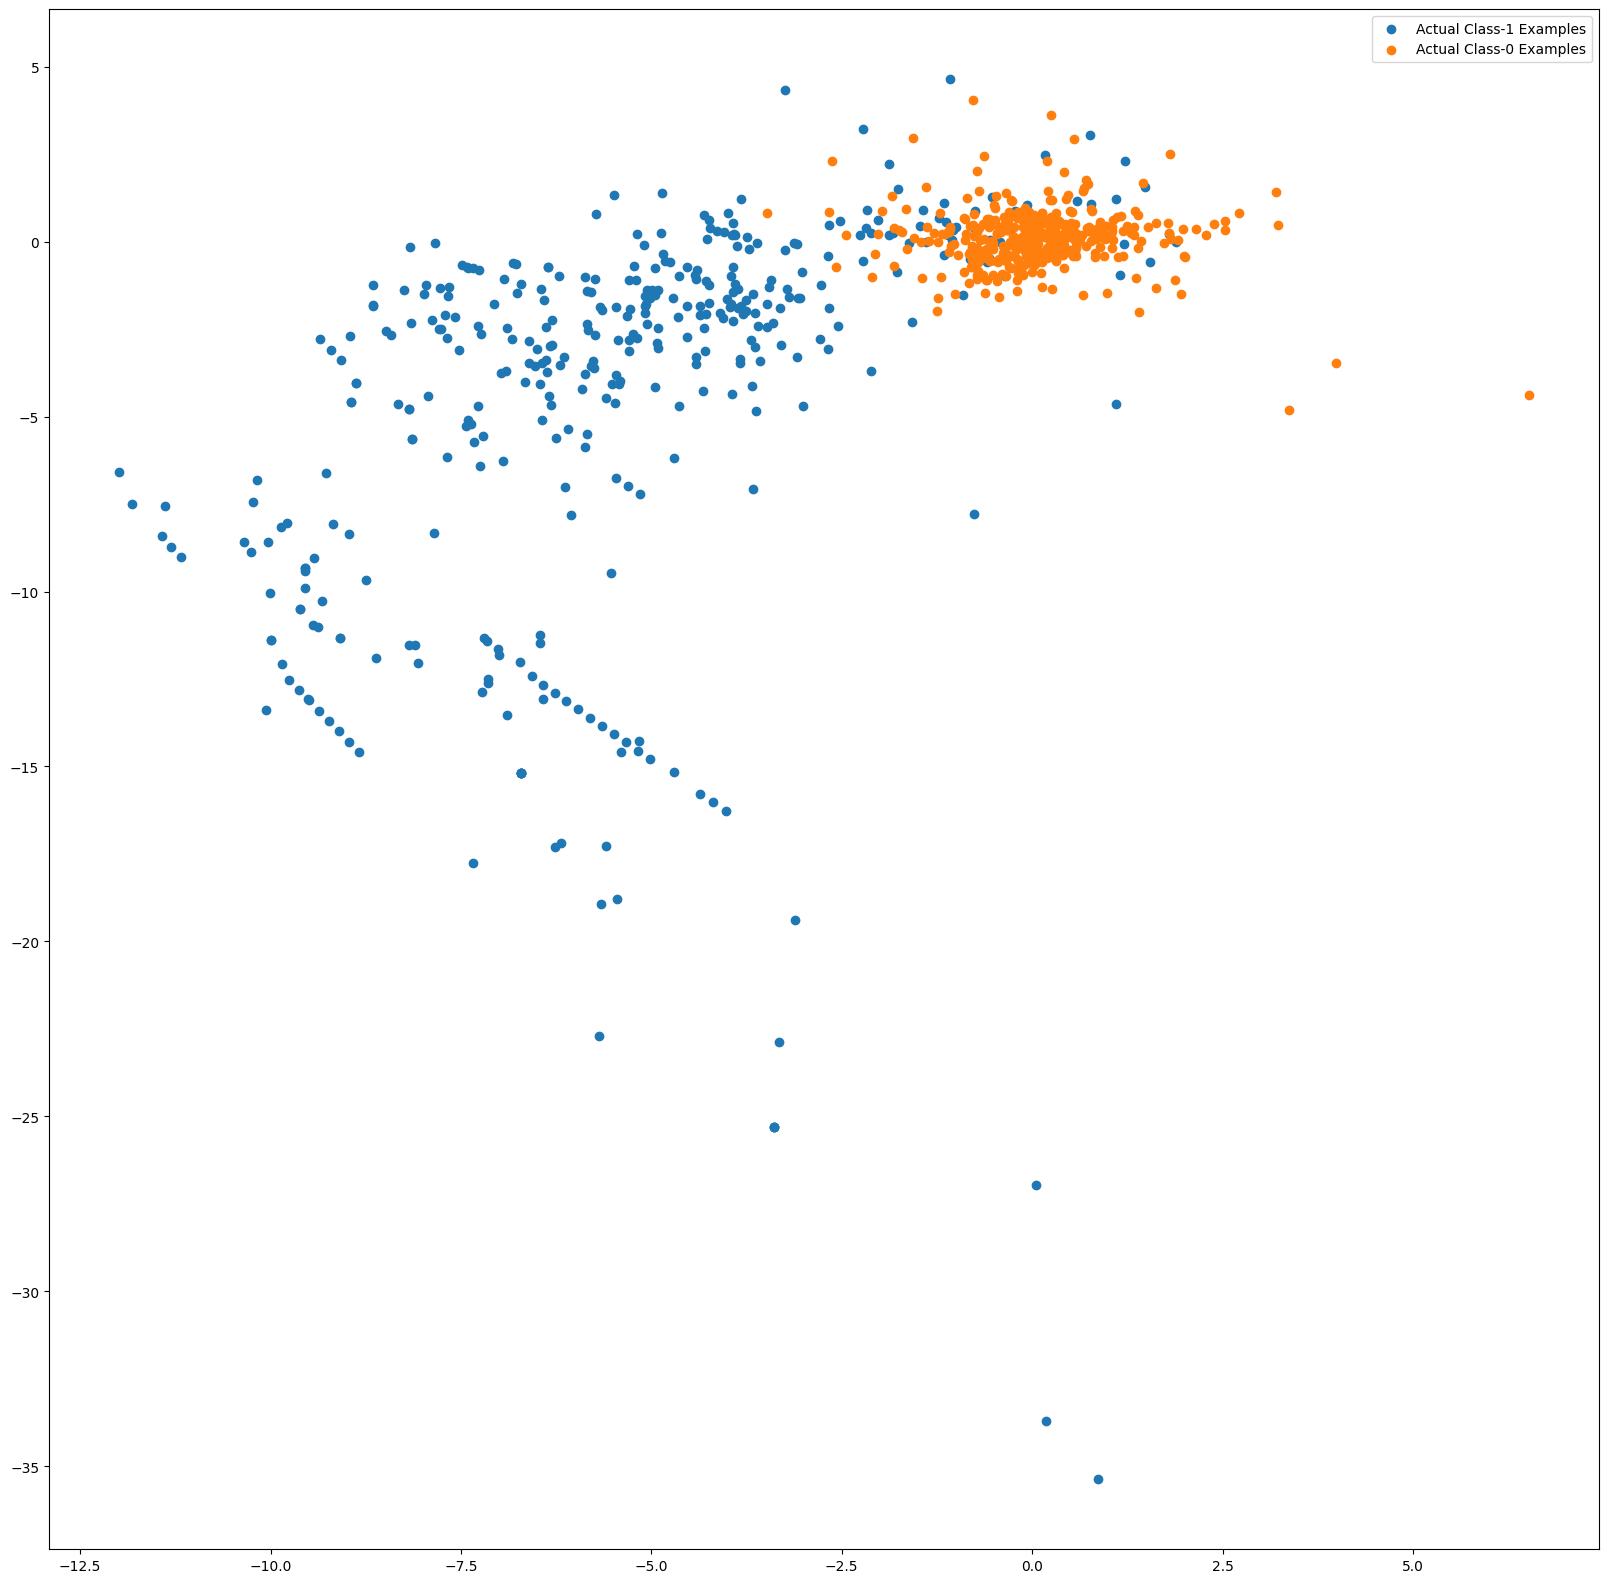

In [160]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()


#**Choosing best model on the imbalanced data**

- We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well.
-More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.
- But if we were to choose one of them , we can go for the best as XGBoost which gives us ROC score of 1.0 on the train data and 0.97 on the test data.

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**



In [161]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)


Train auc = 1.0
Threshold= 0.82052475


We can see that the threshold is 0.82, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.


#**Handling Class imbalance**
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

#Resampling Techniques:

- Oversampling: Duplicate or generate synthetic instances of the minority class to match the majority class size.
- SMOTE (Synthetic Minority Over-sampling Technique): Create synthetic minority class instances by interpolating between neighboring instances.
- ADASYN (Adaptive Synthetic Sampling): Generate synthetic instances in regions where the minority class is difficult to learn.


# **Random Oversampling**

In [165]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [163]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [166]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))


Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


## **Logistic Regression with Oversampling**

In [417]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.10, 0.1, 10,25,50, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [418]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.696612      0.454255         0.056973        0.022690   0.001   
1       1.958907      0.433551         0.052931        0.017383     0.1   
2       1.875352      0.436667         0.054412        0.018232     0.1   
3       1.743457      0.235892         0.047920        0.007242      10   
4       1.952858      0.409786         0.054818        0.018513      25   
5       1.913793      0.446483         0.053710        0.018246      50   
6       1.745878      0.305078         0.056590        0.017932     100   
7       1.835681      0.430130         0.043681        0.000381    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.988941           0.988322           0.988219   
1    {'C': 0.1}           0.989177           0.988541           0.988551   
2    {'C': 0.1}           0.989177           0.988541           0.988551   
3     {'C': 10}           0.989180           0.988539           0.988554   
4     {'C': 25}           0.989180           0.988539           0.988554   
5     {'C': 50}           0.989180           0.988540           0.988554   
6    {'C': 100}           0.989180           0.988540           0.988554   
7   {'C': 1000}           0.989180           0.988540           0.988554   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.987963  ...         0.988403        0.000332                8   
1           0.988229  ...         0.988656        0.000315                6   
2           0.988229  ...         0.988656        0.000315                6   
3           0.988227  ...         0.988656        0.000316                5   
4           0.988227  ...         0.988656        0.000316                4   
5           0.988227  ...         0.988656        0.000316                1   
6           0.988227  ...         0.988656        0.000316                3   
7           0.988227  ...         0.988656        0.000316                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.988336            0.988340            0.988479   
1            0.988617            0.988580            0.988729   
2            0.988617            0.988580            0.988729   
3            0.988619            0.988582            0.988730   
4            0.988619            0.988583            0.988730   
5            0.988619            0.988582            0.988730   
6            0.988619            0.988583            0.988730   
7            0.988619            0.988582            0.988730   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.988590            0.988360          0.988421         0.000099  
1            0.988863            0.988603          0.988678         0.000106  
2            0.988863            0.988603          0.988678         0.000106  
3            0.988861            0.988602          0.988679         0.000105  
4            0.988861            0.988602          0.988679         0.000105  
5            0.988861            0.988602          0.988679         0.000105  
6            0.988861            0.988602          0.988679         0.000105  
7            0.988861            0.988602          0.988679         0.000105  

[8 rows x 21 columns]

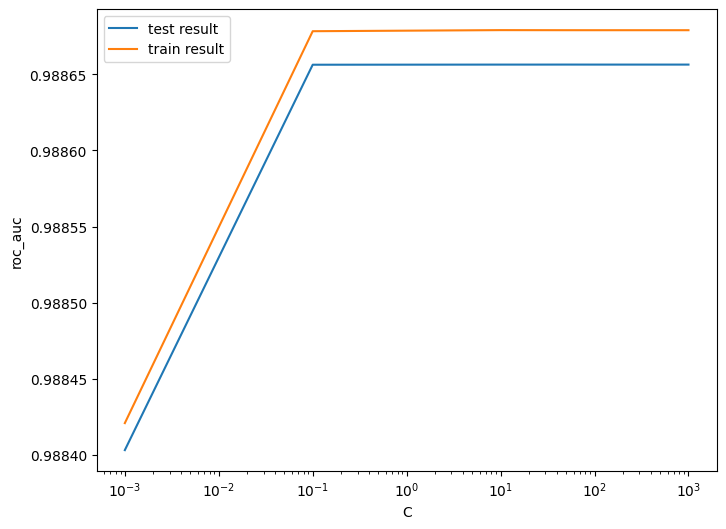

In [419]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [420]:
# best score
best_score = model_cv.best_score_
best_score


0.9886563108766667

In [421]:
# best params
best_params = model_cv.best_params_['C']
best_params


50

In [422]:
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")


Best Score: 0.9886563108766667
Best Params: 50


**Logistic regression with optimal C**

In [423]:
# Instantiate the model with best C
logistic_oversamp = LogisticRegression(C=50)


In [424]:
# Fit the model on the train set
logistic_oversamp_model = logistic_oversamp.fit(X_train, y_train)


**Prediction on train dataset**

In [425]:
# Predictions on the train set
y_train_pred = logistic_oversamp_model.predict(X_train)

In [426]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix


array([[227419,     30],
       [   117,    279]])

In [427]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive


In [428]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))


Accuracy: 0.9993548245517786
Sensitivity: 0.7045454545454546
Specificity: 0.9998681022998562
F1-score: 0.7914893617021277


In [429]:
# classification_report
print(classification_report(y_train, y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [430]:
# Predicted probability
y_train_pred_proba = logistic_oversamp_model.predict_proba(X_train)[:,1]
y_train_pred_proba


array([3.59656149e-05, 1.03905422e-04, 7.61788406e-05, ...,
       5.08759798e-04, 4.77282968e-04, 7.13809099e-04])

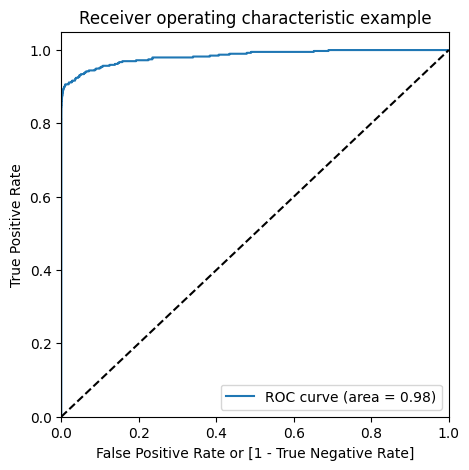

In [431]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


We acheived very good ROC 0.98 on the train set.


**Prediction on Test dataset**

In [432]:
# Prediction on the test set
y_test_pred = logistic_oversamp_model.predict(X_test)


In [433]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56849    17]
 [   39    57]]


In [434]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [435]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))


Accuracy:- 0.9990168884519505
Sensitivity:- 0.59375
Specificity:- 0.9997010515949777
F1-Score:- 0.6705882352941177


In [436]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [437]:
# Predicted probability
y_test_pred_proba = logistic_oversamp_model.predict_proba(X_test)[:,1]


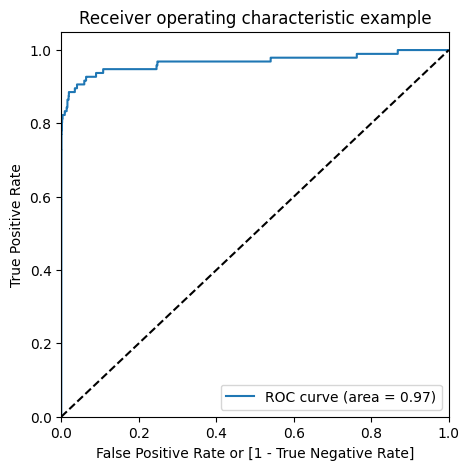

In [438]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set i.e. 0.97

#### **Model summary (*Logistic Regression*)**

**Train set**

Accuracy = 0.99

Sensitivity = 0.70

Specificity = 0.99

F1-Score = 0.79

ROC = 0.98

**Test set**

Accuracy = 0.99

Sensitivity = 0.59

Specificity = 0.99

F1-Score = 0.67

ROC = 0.97

Overall, the model is performing well in the test set


### **XGBOOST**

In [197]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.3],
               'subsample': [0.6, 0.7, 0.8]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.6, 0.7, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [198]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.317095      3.048470         0.238904        0.003520   
1       7.622830      1.209685         0.233661        0.002118   
2       7.375721      1.086335         0.241114        0.010804   
3       7.859788      1.313477         0.240939        0.004598   
4       7.353610      0.903630         0.306899        0.101843   
5       7.479376      1.165677         0.300549        0.098216   
6       6.919480      1.251190         0.233753        0.003217   
7       7.674330      1.249959         0.245842        0.009937   
8       7.430445      1.201052         0.243197        0.005687   

  param_learning_rate param_subsample  \
0                 0.1             0.6   
1                 0.1             0.7   
2                 0.1             0.8   
3                 0.2             0.6   
4                 0.2             0.7   
5                 0.2             0.8   
6                 0.3             0.6   
7                 0.3             0.7   
8                 0.3             0.8   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.6}           0.999599   
1  {'learning_rate': 0.1, 'subsample': 0.7}           0.999588   
2  {'learning_rate': 0.1, 'subsample': 0.8}           0.999565   
3  {'learning_rate': 0.2, 'subsample': 0.6}           0.999893   
4  {'learning_rate': 0.2, 'subsample': 0.7}           0.999897   
5  {'learning_rate': 0.2, 'subsample': 0.8}           0.999893   
6  {'learning_rate': 0.3, 'subsample': 0.6}           0.999956   
7  {'learning_rate': 0.3, 'subsample': 0.7}           0.999942   
8  {'learning_rate': 0.3, 'subsample': 0.8}           0.999952   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999642           0.999636         0.999626        0.000019   
1           0.999595           0.999594         0.999592        0.000003   
2           0.999595           0.999647         0.999602        0.000034   
3           0.999909           0.999898         0.999900        0.000007   
4           0.999912           0.999907         0.999906        0.000006   
5           0.999910           0.999896         0.999900        0.000007   
6           0.999953           0.999949         0.999953        0.000003   
7           0.999961           0.999943         0.999949        0.000009   
8           0.999963           0.999948         0.999954        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.999637            0.999634   
1                9            0.999630            0.999584   
2                8            0.999605            0.999589   
3                5            0.999909            0.999912   
4                4            0.999910            0.999912   
5                6            0.999910            0.999912   
6                2            0.999967            0.999958   
7                3            0.999961            0.999969   
8                1            0.999966            0.999968   

   split2_train_score  mean_train_score  std_train_score  
0            0.999649          0.999640         0.000006  
1            0.999604          0.999606         0.000019  
2            0.999648          0.999614         0.000025  
3            0.999923          0.999915         0.000006  
4            0.999919          0.999914         0.000004  
5            0.999917          0.999913         0.000003  
6            0.999971          0.999965         0.000005  
7            0.999970          0.999967         0.000004  
8            0.999965          0.999966         0.000002

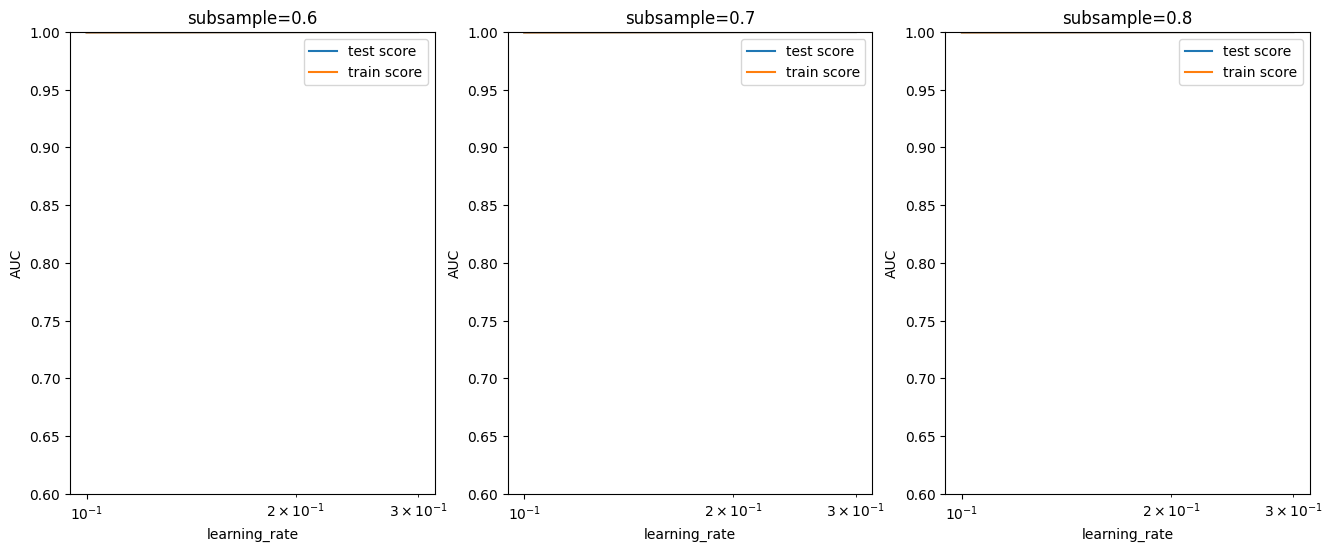

In [199]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1,0.2, 0.3],
             'subsample': [0.6, 0.7, 0.8]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [200]:
model_cv.best_params_


{'learning_rate': 0.3, 'subsample': 0.8}

In [218]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.3,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.8,
         'objective':'binary:logistic'}

# fit model on training data
xgb_oversamp_model = XGBClassifier(params = params)
xgb_oversamp_model.fit(X_train_ros, y_train_ros)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.8}, ...)

**Prediction on train dataset**

In [219]:
# Predictions on the train set
y_train_pred = xgb_oversamp_model.predict(X_train_ros)


In [220]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)


[[227449      0]
 [     0 227449]]


In [222]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [225]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))


Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [206]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [226]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_oversamp_model.predict_proba(X_train_ros)[:,1]


In [228]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba_imb_xgb)
auc


1.0

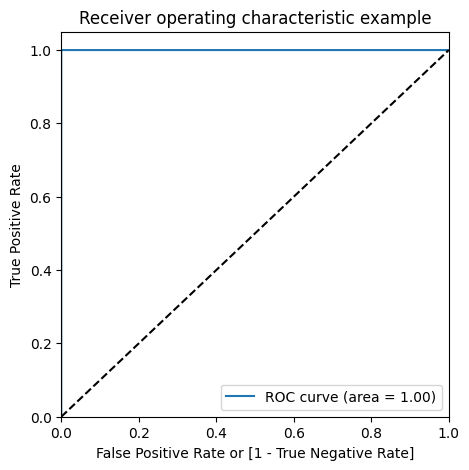

In [229]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba_imb_xgb)


**Prediction on test dataset**

In [230]:
# Predictions on the test set
y_test_pred = xgb_oversamp_model.predict(X_test)


In [231]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56853    13]
 [   23    73]]


In [232]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [233]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))


Accuracy:- 0.9993679997191109
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997713923961594
F1-Score:- 0.802197802197802


In [234]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.85      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [235]:
# Predicted probability
y_test_pred_proba = xgb_oversamp_model.predict_proba(X_test)[:,1]


In [236]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9740587155183531

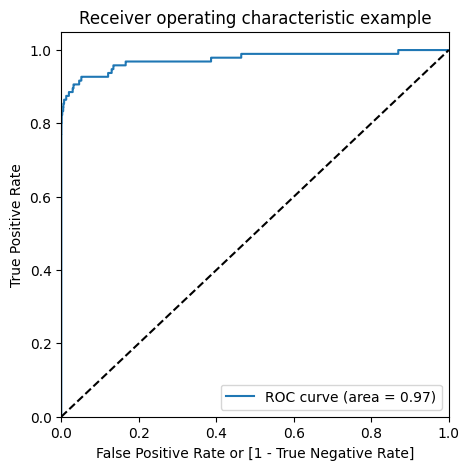

In [237]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


We can see that we have very good ROC on the test set i.e. 0.97

#### **Model summary (XGBOOST)**

**Train set**

Accuracy = 1

Sensitivity = 1

Specificity = 1

F1-Score = 1

ROC = 1

**Test set**

Accuracy = 0.99

Sensitivity = 0.76

Specificity = 0.99

F1-Score = 0.80

ROC = 0.97

Overall, the model is performing well in the test set


# **Decision Tree**

In [238]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(25, 100, 25),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(25, 100, 25)},
             scoring='roc_auc', verbose=1)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(25, 100, 25)},
             scoring='roc_auc', verbose=1)

In [239]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        5.645326      0.687385         0.046154        0.000505   
1        5.157954      0.534744         0.055271        0.012857   
2        5.008490      0.348329         0.055455        0.013190   
3        5.011137      0.545774         0.049307        0.004927   
4        4.982120      0.272134         0.055715        0.012360   
5        4.959283      0.433716         0.046396        0.000345   
6        5.270279      0.489895         0.059217        0.011699   
7        5.081838      0.479451         0.046877        0.000491   
8        4.992596      0.310753         0.055983        0.012948   
9        7.927640      0.205891         0.060694        0.011674   
10       7.655450      0.474313         0.058442        0.012664   
11       7.903260      0.538829         0.048859        0.000662   
12       7.970786      0.417760         0.059225        0.013154   
13       7.920487      0.388348         0.051551        0.006355   
14       8.008281      0.531483         0.051254        0.004964   
15       7.549570      0.493262         0.047546        0.000542   
16       8.039773      0.624882         0.047954        0.001102   
17       7.982915      0.498121         0.050691        0.001761   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                5                     25                      25   
1                5                     25                      50   
2                5                     25                      75   
3                5                     50                      25   
4                5                     50                      50   
5                5                     50                      75   
6                5                     75                      25   
7                5                     75                      50   
8                5                     75                      75   
9               10                     25                      25   
10              10                     25                      50   
11              10                     25                      75   
12              10                     50                      25   
13              10                     50                      50   
14              10                     50                      75   
15              10                     75                      25   
16              10                     75                      50   
17              10                     75                      75   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.983569   
1   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.983569   
2   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.983569   
3   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.983567   
4   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.983568   
5   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.983567   
6   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.983547   
7   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.983549   
8   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.983549   
9   {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.999496   
10  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.999506   
11  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.999517   
12  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999505   
13  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999484   
14  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999582   
15  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.999605   
16  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.999566   
17  {'max_depth': 10, 'min_samp

In [240]:
grid_search.best_score_


0.9996276381955029

In [241]:
print(grid_search.best_estimator_)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=25)


In [245]:
# Model with optimal hyperparameters
dt_oversamp_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=75,
                                  min_samples_split=25)

dt_oversamp_model.fit(X_train_ros, y_train_ros)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=25,
                       random_state=100)

**Prediction on train dataset**


In [246]:
# Predictions on the train set
y_train_pred = dt_oversamp_model.predict(X_train_ros)


In [247]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)


[[225296   2153]
 [     0 227449]]


In [248]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [249]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))


Accuracy:- 0.9952670708598411
Sensitivity:- 1.0
Specificity:- 0.9905341417196822
F1-Score:- 0.9952893659569719


In [250]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [255]:
# Predicted probability
y_train_pred_proba = dt_oversamp_model.predict_proba(X_train_ros)[:,1]


In [256]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc


0.9997637237691026

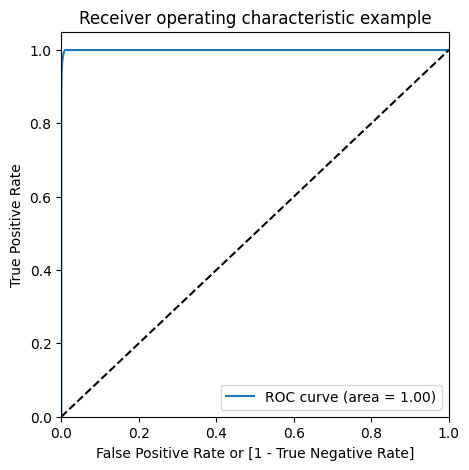

In [258]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)


**Prediction on Test dataset**

In [259]:
# Predictions on the test set
y_test_pred = dt_oversamp_model.predict(X_test)


In [260]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56284   582]
 [   20    76]]


In [261]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [262]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))


Accuracy:- 0.989431550858467
Sensitivity:- 0.7916666666666666
Specificity:- 0.9897654134280589
F1-Score:- 0.9952893659569719


In [263]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.12      0.79      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.89      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [264]:
# Predicted probability
y_test_pred_proba = dt_oversamp_model.predict_proba(X_test)[:,1]


In [265]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.8946054833585386

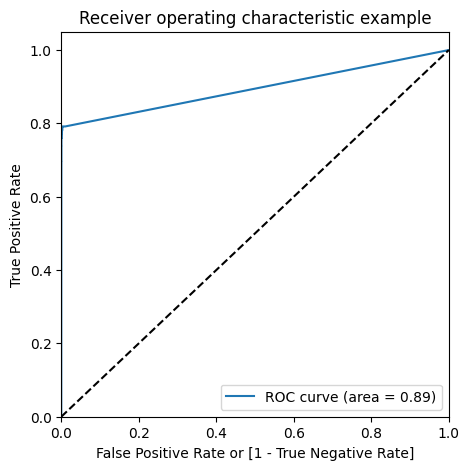

In [266]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (Decision Tree)**

**Train set**

Accuracy = 0.99

Sensitivity = 1

Specificity = 0.99

F1-Score = 0.99

ROC = 1

**Test set**

Accuracy = 0.98

Sensitivity = 0.79

Specificity = 0.98

F1-Score = 0.99

ROC = 0.89



# **Random Oversampling**

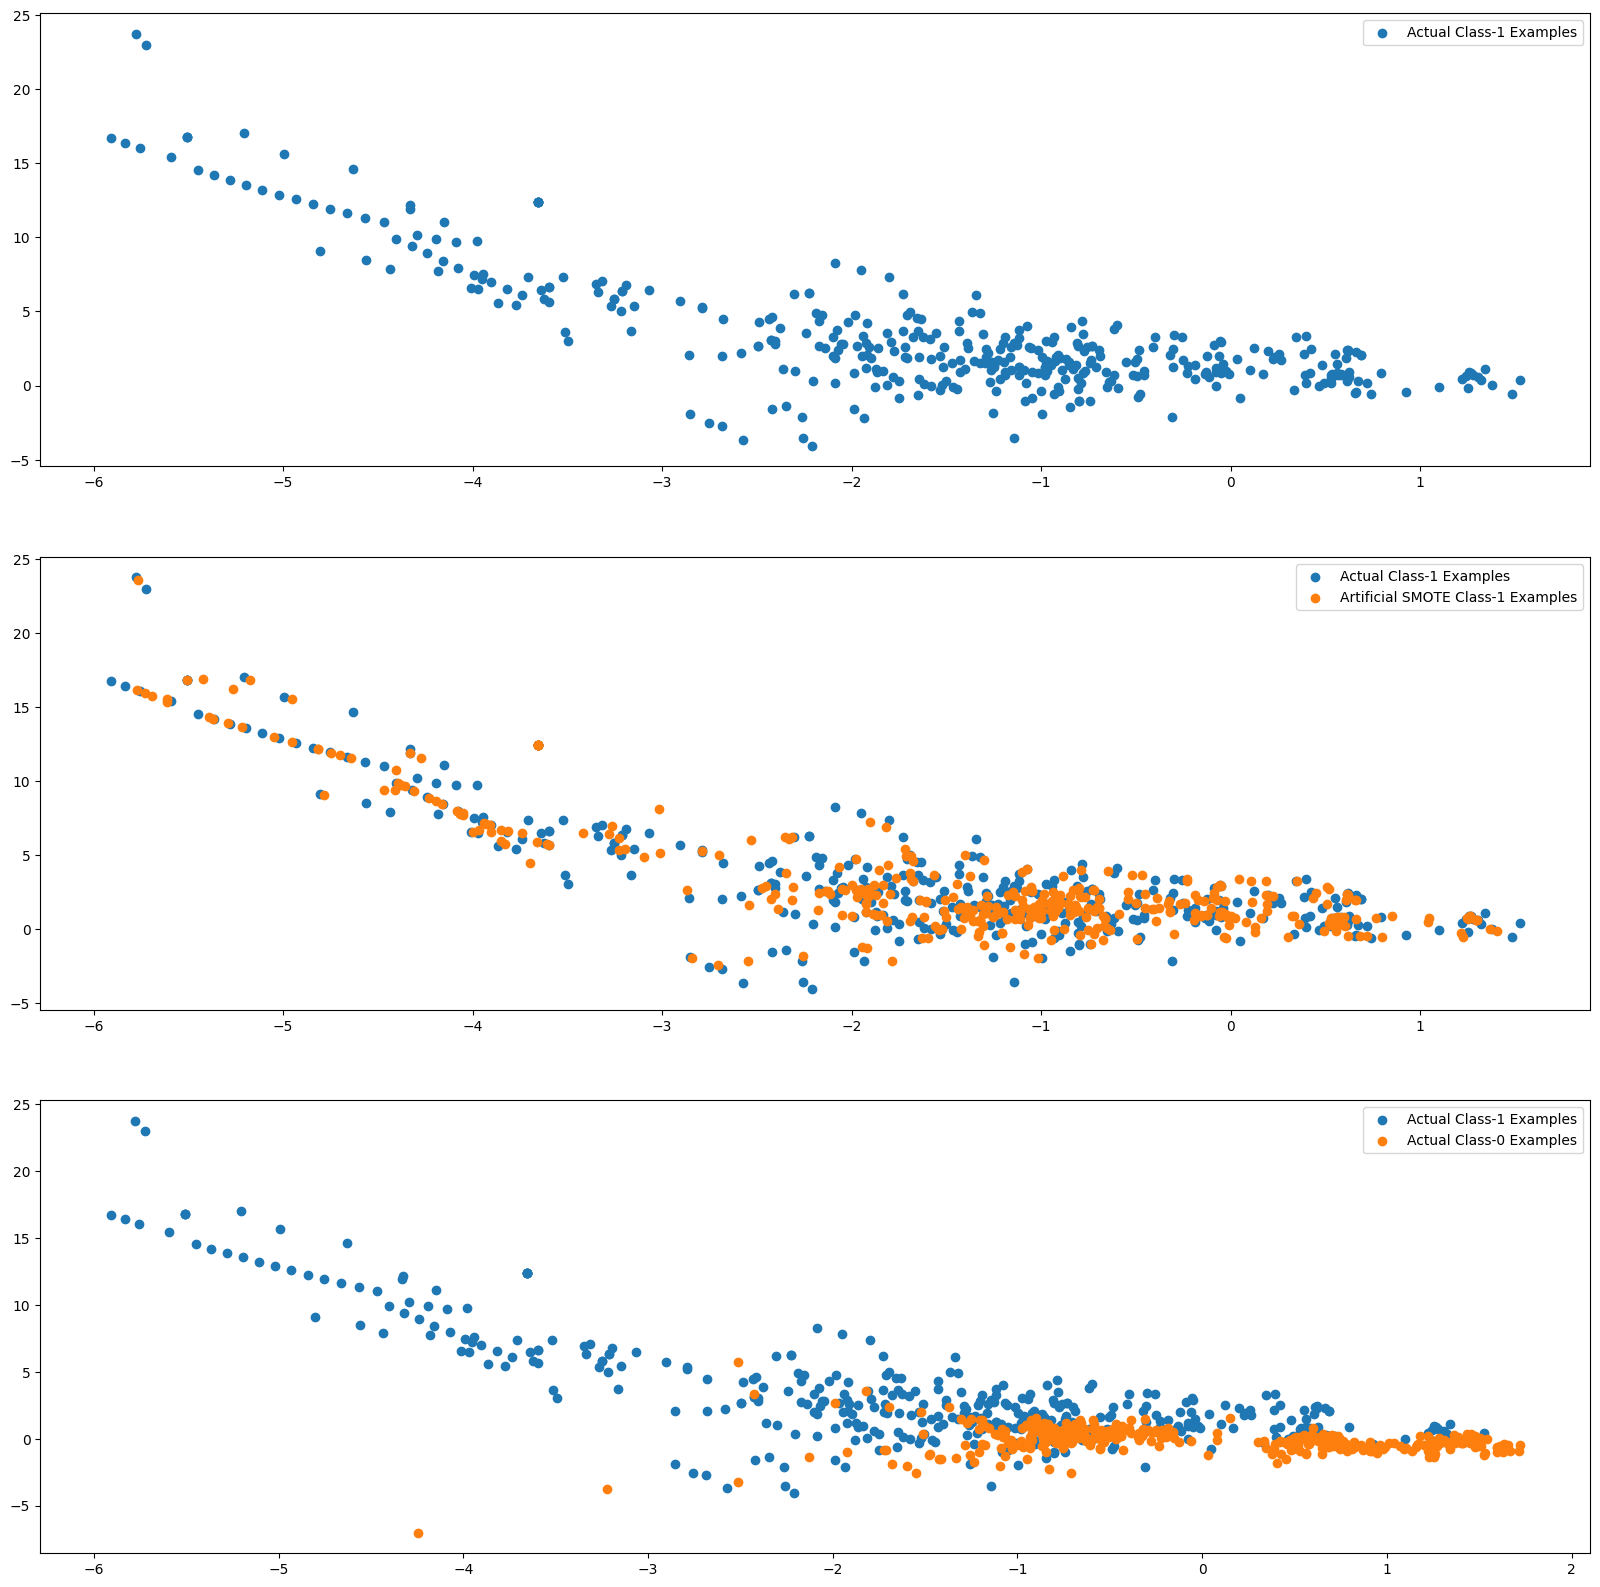

In [273]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [274]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)


Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


## **Model Building after balancing data with SMOTE**

### LOGISTIC REGRESSION(SMOTE)

In [439]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.10, 0.1, 10,25,50, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [440]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.399629      0.427639         0.054782        0.017693   0.001   
1       1.842357      0.435812         0.061714        0.019640     0.1   
2       1.599882      0.093592         0.058956        0.016992     0.1   
3       1.744649      0.443846         0.060035        0.027376      10   
4       1.819105      0.476095         0.061672        0.017129      25   
5       1.740204      0.417758         0.054694        0.017882      50   
6       1.628803      0.143742         0.049134        0.006051     100   
7       1.832716      0.421217         0.057288        0.017981    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.989448           0.989462           0.989851   
1    {'C': 0.1}           0.989650           0.989751           0.990152   
2    {'C': 0.1}           0.989650           0.989751           0.990152   
3     {'C': 10}           0.989648           0.989753           0.990153   
4     {'C': 25}           0.989648           0.989753           0.990153   
5     {'C': 50}           0.989648           0.989753           0.990153   
6    {'C': 100}           0.989648           0.989753           0.990153   
7   {'C': 1000}           0.989648           0.989753           0.990153   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.989609  ...         0.989637        0.000171                8   
1           0.989860  ...         0.989905        0.000197                1   
2           0.989860  ...         0.989905        0.000197                1   
3           0.989858  ...         0.989905        0.000198                3   
4           0.989858  ...         0.989905        0.000198                4   
5           0.989858  ...         0.989905        0.000198                5   
6           0.989858  ...         0.989905        0.000198                6   
7           0.989858  ...         0.989905        0.000198                7   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.989666            0.989655            0.989594   
1            0.989948            0.989918            0.989862   
2            0.989948            0.989918            0.989862   
3            0.989949            0.989918            0.989862   
4            0.989949            0.989918            0.989862   
5            0.989949            0.989918            0.989862   
6            0.989949            0.989918            0.989862   
7            0.989949            0.989918            0.989862   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.989730            0.989618          0.989653         0.000046  
1            0.989996            0.989885          0.989922         0.000047  
2            0.989996            0.989885          0.989922         0.000047  
3            0.989996            0.989885          0.989922         0.000047  
4            0.989996            0.989885          0.989922         0.000047  
5            0.989996            0.989885          0.989922         0.000047  
6            0.989996            0.989885          0.989922         0.000047  
7            0.989996            0.989885          0.989922         0.000047  

[8 rows x 21 columns]

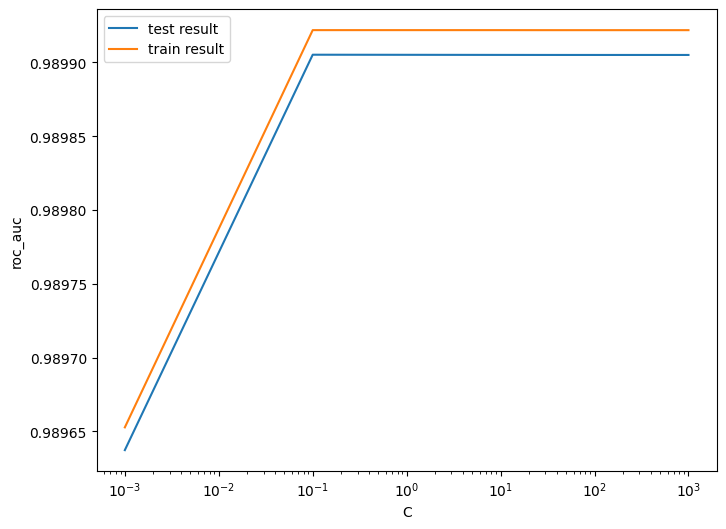

In [441]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')


In [442]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])


0.9899051464144639
0.1


In [443]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)


In [444]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)


**Prediction on Train dataset**

In [445]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)


In [446]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)


[[222012   5437]
 [ 17496 209953]]


In [447]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [448]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))


Accuracy:- 0.9495865007100492
Sensitivity:- 0.9230772612761542
Specificity:- 0.9760957401439444
F1-Score:- 0.9482136848832194


In [449]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [450]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]


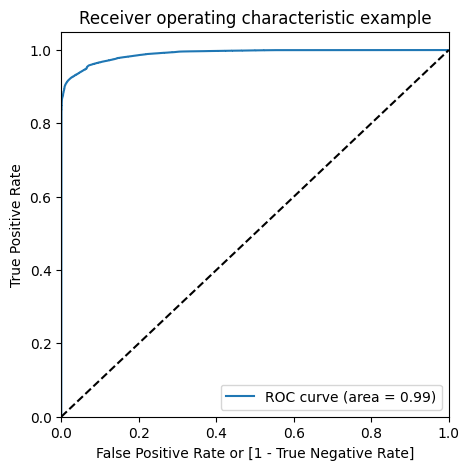

In [451]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)


**Prediction on test dataset**

In [452]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)


In [453]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[55452  1414]
 [   10    86]]


In [454]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [455]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))



Accuracy:- 0.9750008777781679
Sensitivity:- 0.8958333333333334
Specificity:- 0.9751345267822601
F1-Score:- 0.10776942355889725


In [456]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [457]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]


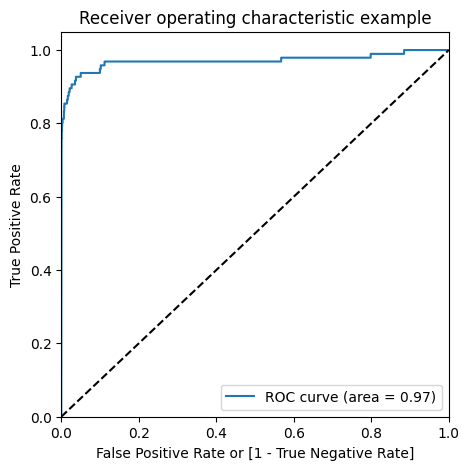

In [458]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (Logistic Regression(SMOTE))**

**Train set**

Accuracy = 0.94

Sensitivity = 0.92

Specificity = 0.97

ROC = 0.99

**Test set**

Accuracy = 0.97

Sensitivity = 0.89

Specificity = 0.97

ROC = 0.97




## **XGBoost(by SMOTE)**

In [296]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.3],
               'subsample': [0.6, 0.7, 0.8]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.6, 0.7, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [297]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.715038      1.426155         0.245301        0.004579   
1       6.863626      1.266705         0.282855        0.056109   
2       7.397517      1.124490         0.250954        0.006239   
3       7.640055      1.095575         0.314687        0.091615   
4       7.684676      1.223464         0.253935        0.010390   
5       7.763935      1.296846         0.256915        0.004810   
6       7.598209      0.927166         0.316671        0.093942   
7       7.805518      1.231146         0.254206        0.011046   
8       6.916127      1.284267         0.300162        0.065067   

  param_learning_rate param_subsample  \
0                 0.1             0.6   
1                 0.1             0.7   
2                 0.1             0.8   
3                 0.2             0.6   
4                 0.2             0.7   
5                 0.2             0.8   
6                 0.3             0.6   
7                 0.3             0.7   
8                 0.3             0.8   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.6}           0.998777   
1  {'learning_rate': 0.1, 'subsample': 0.7}           0.998790   
2  {'learning_rate': 0.1, 'subsample': 0.8}           0.998774   
3  {'learning_rate': 0.2, 'subsample': 0.6}           0.999630   
4  {'learning_rate': 0.2, 'subsample': 0.7}           0.999639   
5  {'learning_rate': 0.2, 'subsample': 0.8}           0.999662   
6  {'learning_rate': 0.3, 'subsample': 0.6}           0.999842   
7  {'learning_rate': 0.3, 'subsample': 0.7}           0.999841   
8  {'learning_rate': 0.3, 'subsample': 0.8}           0.999834   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.998948           0.998905         0.998877        0.000072   
1           0.998888           0.998805         0.998828        0.000043   
2           0.998921           0.998751         0.998816        0.000075   
3           0.999717           0.999691         0.999679        0.000036   
4           0.999724           0.999671         0.999678        0.000035   
5           0.999707           0.999646         0.999672        0.000025   
6           0.999859           0.999842         0.999848        0.000008   
7           0.999870           0.999836         0.999849        0.000015   
8           0.999867           0.999834         0.999845        0.000015   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.998915            0.998872   
1                8            0.998940            0.998813   
2                9            0.998927            0.998833   
3                4            0.999707            0.999688   
4                5            0.999714            0.999705   
5                6            0.999728            0.999687   
6                2            0.999882            0.999875   
7                1            0.999876            0.999875   
8                3            0.999885            0.999877   

   split2_train_score  mean_train_score  std_train_score  
0            0.998939          0.998909     2.767144e-05  
1            0.998832          0.998862     5.593426e-05  
2            0.998787          0.998849     5.833391e-05  
3            0.999731          0.999709     1.746664e-05  
4            0.999714          0.999711     4.147449e-06  
5            0.999685          0.999700     1.952731e-05  
6            0.999874          0.999877     3.648296e-06  
7            0.999877          0.999876     5.598815e-07  
8            0.999874          0.999879     4.652812e-06

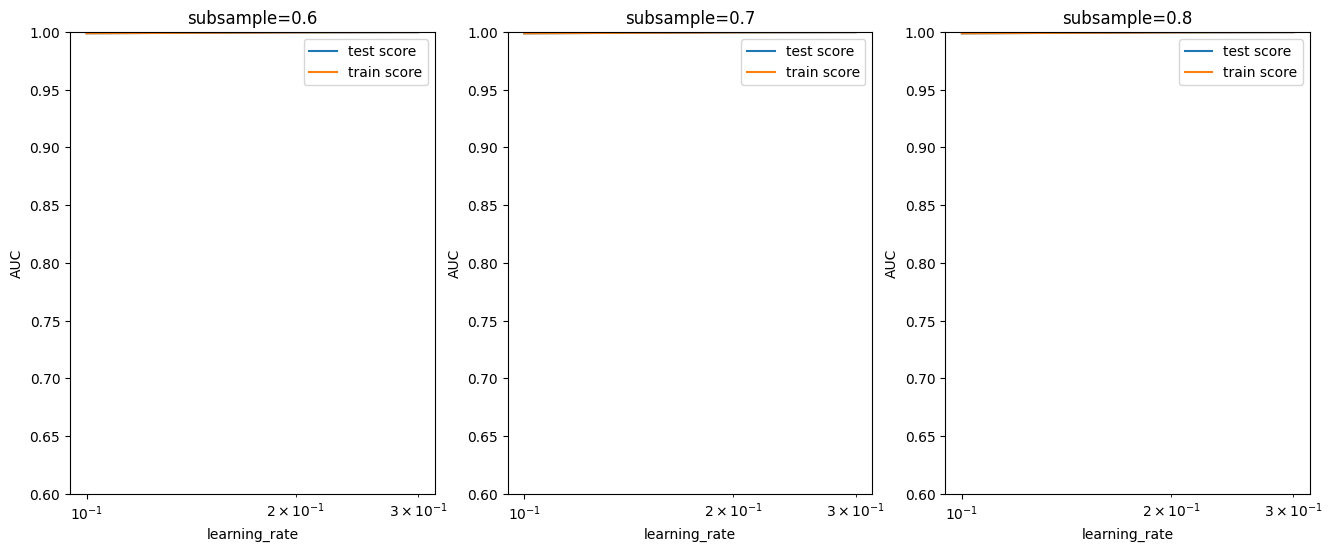

In [298]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1,0.2, 0.3],
             'subsample': [0.6, 0.7, 0.8]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')


In [299]:
model_cv.best_params_


{'learning_rate': 0.3, 'subsample': 0.7}

In [300]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.3,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.7,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.7}, ...)

**Prediction on train dataset**


In [301]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)


In [302]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)


[[227447      2]
 [     0 227449]]


In [303]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [304]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9999956034099952
Sensitivity:- 1.0
Specificity:- 0.9999912068199904


In [305]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [306]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]


In [307]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc


1.0

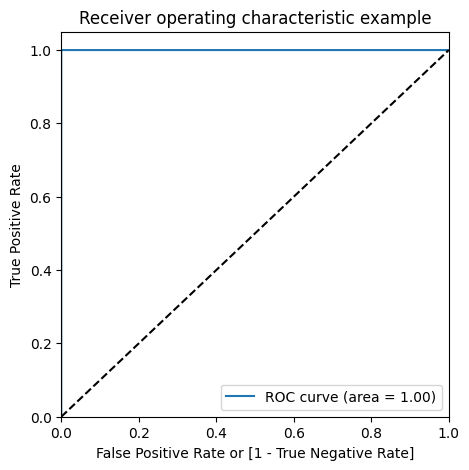

In [308]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


**Prediction on test dataset**


In [309]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)


In [310]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56830    36]
 [   20    76]]


In [311]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [312]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9990168884519505
Sensitivity:- 0.7916666666666666
Specificity:- 0.9993669327893645


In [314]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.79      0.73        96

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [315]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]


In [316]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9634171048312408

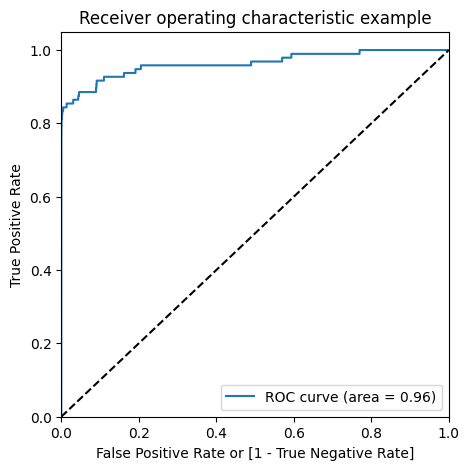

In [317]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (XGBOOST(SMOTE))**

**Train set**

Accuracy = 0.99

Sensitivity = 1

Specificity = 0.99

ROC = 1

**Test set**

Accuracy = 0.99

Sensitivity = 0.79

Specificity = 0.99

ROC = 0.96




## **Decision Tree (by SMOTE)**

In [318]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(25, 100, 25),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(25, 100, 25)},
             scoring='roc_auc', verbose=1)

In [319]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        9.175166      0.756575         0.063714        0.014926   
1        8.736561      0.720521         0.059966        0.011281   
2        8.301378      0.552883         0.057478        0.014564   
3        8.793857      0.171860         0.055166        0.011831   
4        8.633778      0.368208         0.060101        0.011621   
5        9.180835      1.177252         0.047633        0.000410   
6        8.624604      0.450905         0.056604        0.013400   
7        8.556190      0.561688         0.065301        0.013211   
8        8.284093      0.555161         0.059006        0.010908   
9       16.037974      0.250068         0.067682        0.012850   
10      15.679875      0.048457         0.051057        0.000731   
11      15.747209      0.066842         0.061207        0.012779   
12      16.067680      0.182587         0.069901        0.009452   
13      15.963738      0.182600         0.051811        0.001036   
14      15.859684      0.239471         0.061893        0.014106   
15      15.859226      0.214892         0.060813        0.014464   
16      15.544598      0.038313         0.052234        0.002445   
17      15.602733      0.065672         0.063131        0.015353   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                5                     25                      25   
1                5                     25                      50   
2                5                     25                      75   
3                5                     50                      25   
4                5                     50                      50   
5                5                     50                      75   
6                5                     75                      25   
7                5                     75                      50   
8                5                     75                      75   
9               10                     25                      25   
10              10                     25                      50   
11              10                     25                      75   
12              10                     50                      25   
13              10                     50                      50   
14              10                     50                      75   
15              10                     75                      25   
16              10                     75                      50   
17              10                     75                      75   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.985927   
1   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.985927   
2   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.985927   
3   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.985972   
4   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.985960   
5   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.985972   
6   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.985932   
7   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.985932   
8   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.985920   
9   {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.997947   
10  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.998009   
11  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.997964   
12  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.997928   
13  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.997942   
14  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.997989   
15  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.998053   
16  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.998057   
17  {'max_depth': 10, 'min_samp

In [320]:
grid_search.best_score_


0.9981181307700338

In [321]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=50)

In [322]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=75,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=50,
                       random_state=100)

**Prediction on train dataset**


In [323]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)


In [324]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)


[[223743   3706]
 [  2586 224863]]


In [325]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [326]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9861683278449235
Sensitivity:- 0.9886304182476071
Specificity:- 0.9837062374422398


In [327]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [328]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]


In [329]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc


0.99846115245106

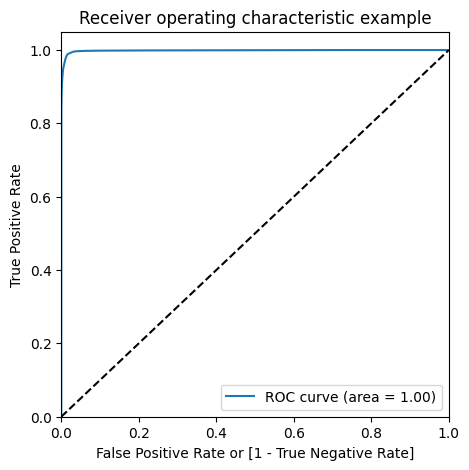

In [330]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


**Prediction on test dataset**

In [331]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)


In [332]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[55835  1031]
 [   20    76]]


In [333]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [334]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9815491029107124
Sensitivity:- 0.7916666666666666
Specificity:- 0.9818696584954103


In [335]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.79      0.13        96

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [336]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]


In [337]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.8597906335361494

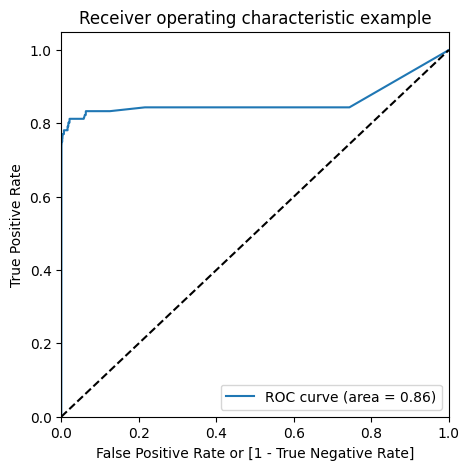

In [338]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (Decision Tree(SMOTE))**

**Train set**

Accuracy = 0.98

Sensitivity = 0.98

Specificity = 0.98

ROC = 1

**Test set**

Accuracy = 0.98

Sensitivity = 0.79

Specificity = 0.98

ROC = 0.86



## **AdaSyn (Adaptive Synthetic Sampling)**


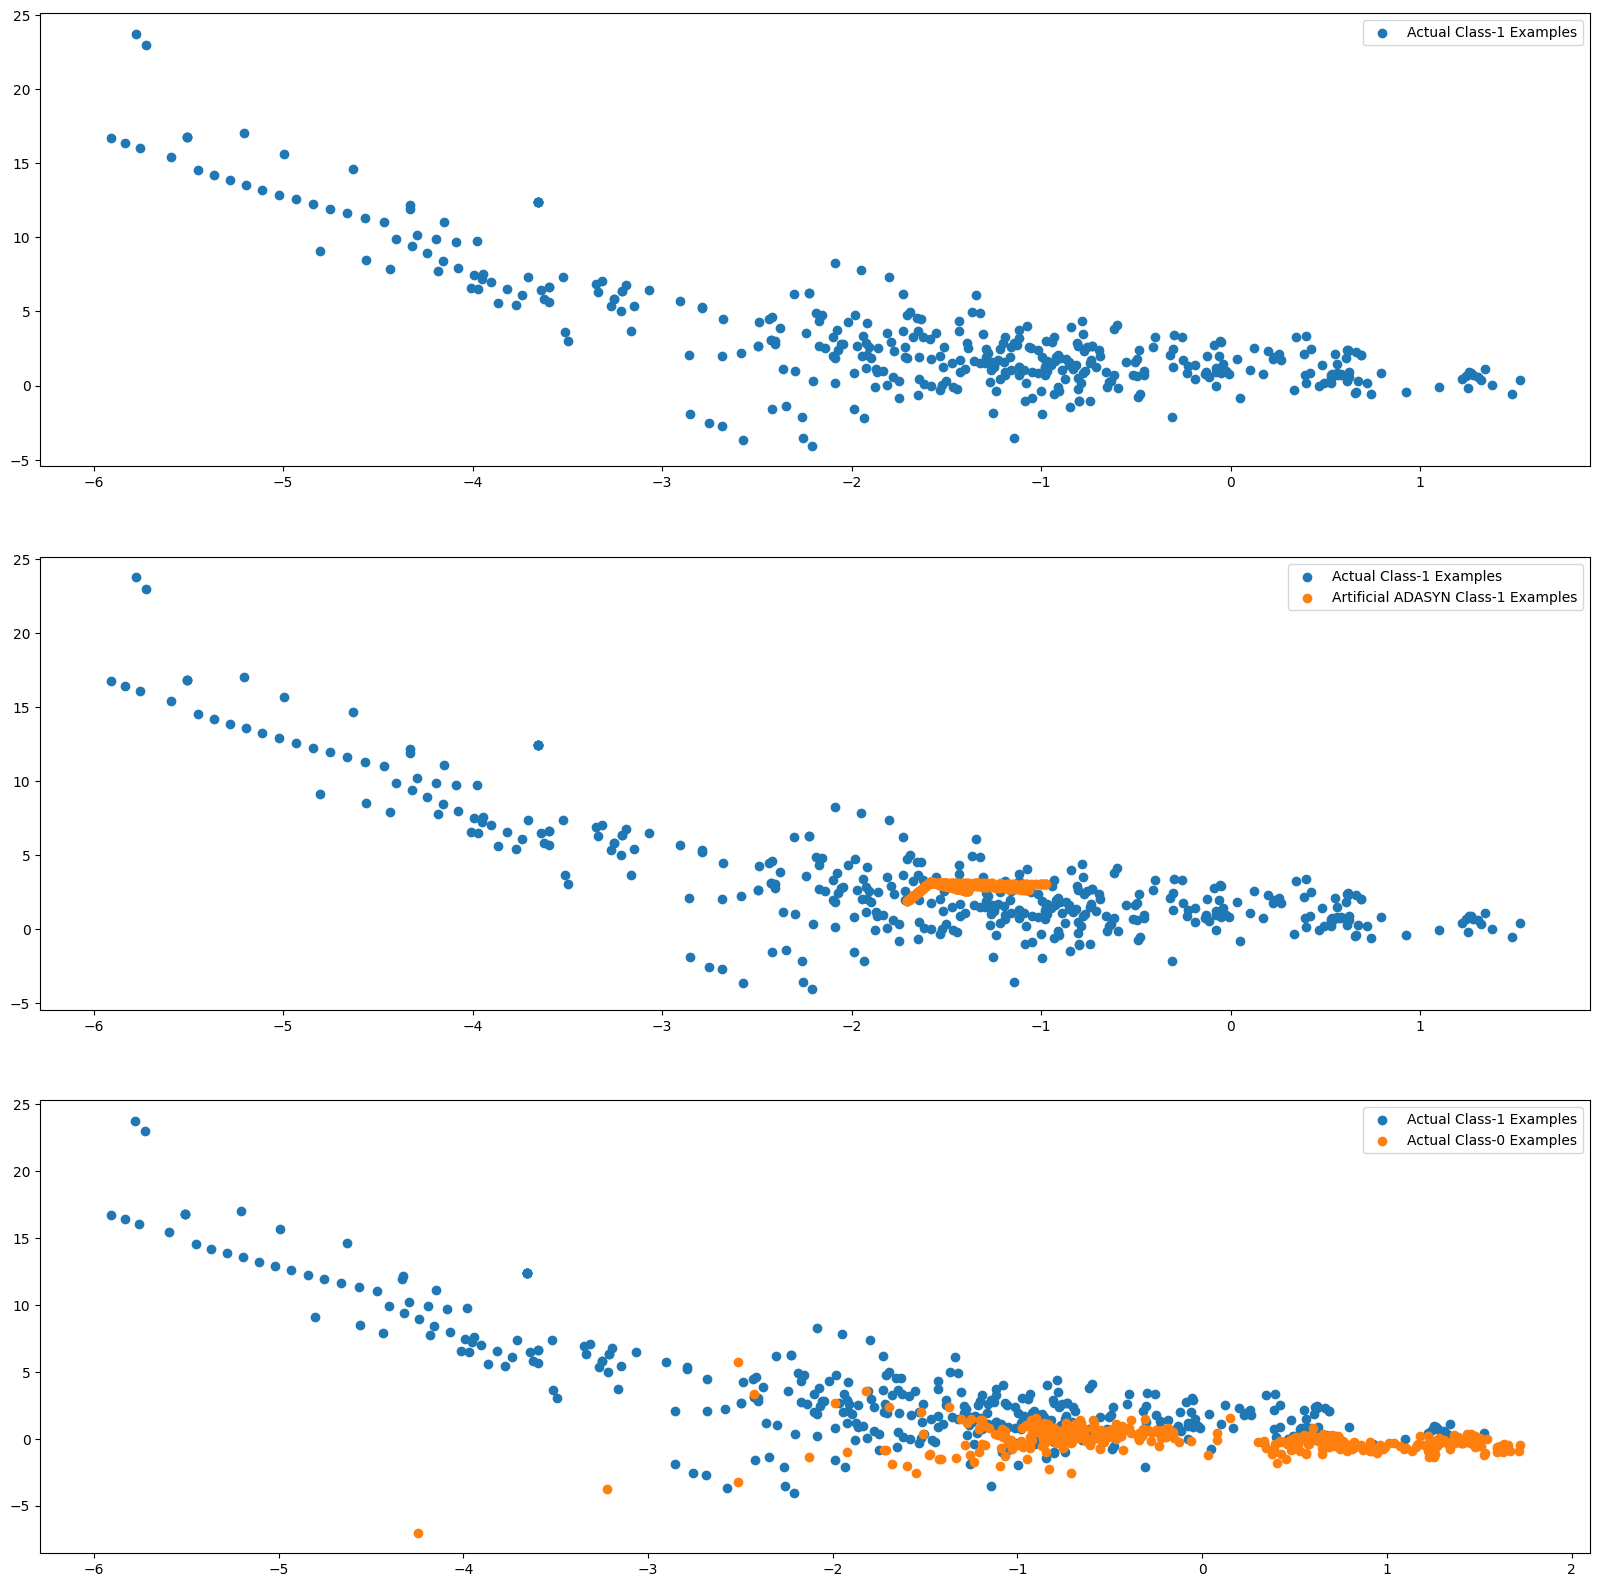

In [339]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [340]:
# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))


Before sampling class distribution: Counter({0: 227449, 1: 396})
New class distribution: Counter({0: 227449, 1: 227448})


## **Logistic Regression (with Adasyn)**


In [459]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.10, 0.1, 10,25,50, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [460]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.331862      0.230999         0.129351        0.024282   0.001   
1       1.670855      0.307230         0.076475        0.000460     0.1   
2       1.407363      0.084405         0.077083        0.000422     0.1   
3       1.917614      0.573826         0.125405        0.035056      10   
4       1.400297      0.123522         0.077610        0.000964      25   
5       1.713472      0.349656         0.102792        0.035771      50   
6       1.734386      0.350301         0.078887        0.000259     100   
7       1.458006      0.106869         0.078725        0.000746    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.962076           0.960772           0.962080   
1    {'C': 0.1}           0.963484           0.962303           0.963512   
2    {'C': 0.1}           0.963484           0.962303           0.963512   
3     {'C': 10}           0.963492           0.962312           0.963517   
4     {'C': 25}           0.963492           0.962312           0.963517   
5     {'C': 50}           0.963492           0.962312           0.963517   
6    {'C': 100}           0.963492           0.962312           0.963517   
7   {'C': 1000}           0.963492           0.962312           0.963517   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.961643        0.000615                8            0.961360   
1         0.963100        0.000563                6            0.962873   
2         0.963100        0.000563                6            0.962873   
3         0.963107        0.000562                5            0.962882   
4         0.963107        0.000562                4            0.962882   
5         0.963107        0.000562                3            0.962882   
6         0.963107        0.000562                2            0.962882   
7         0.963107        0.000562                1            0.962882   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.961937            0.961717          0.961671         0.000238  
1            0.963323            0.963175          0.963124         0.000187  
2            0.963323            0.963175          0.963124         0.000187  
3            0.963330            0.963181          0.963131         0.000186  
4            0.963330            0.963181          0.963131         0.000186  
5            0.963330            0.963181          0.963131         0.000186  
6            0.963330            0.963181          0.963131         0.000186  
7            0.963330            0.963181          0.963131         0.000186

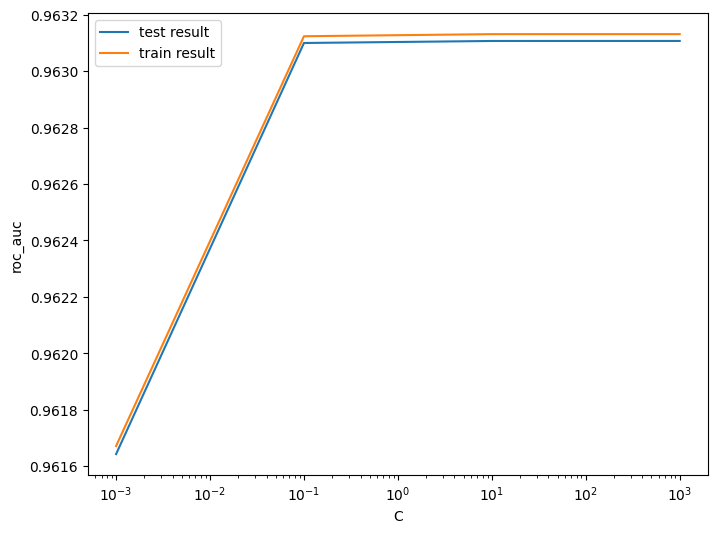

In [461]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [462]:
print(model_cv.best_score_)
print(model_cv.best_params_)


0.9631069498522901
{'C': 1000}


In [463]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)


In [464]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)


**Prediction on train dataset**

In [465]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)


In [466]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)


[[207012  20437]
 [ 31436 196012]]


In [467]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [468]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))


Accuracy:- 0.8859675926638337
Sensitivity:- 0.8617881889486828
Specificity:- 0.9101468900720601
F1-Score:- 0.8831418099243744


In [469]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [470]:
#Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]


In [471]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc


0.9631337036064085

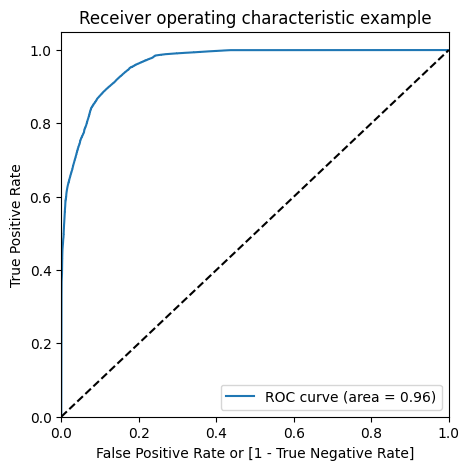

In [472]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)


**Prediction on test dataset**

In [473]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)


In [474]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[51617  5249]
 [    4    92]]


In [475]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [476]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9077806256802781
Sensitivity:- 0.9583333333333334
Specificity:- 0.9076952836492808


In [477]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [478]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]


In [479]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9671557000961324

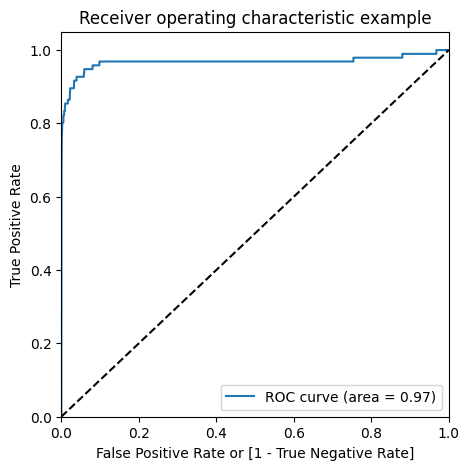

In [480]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (Logistic Regression(ADASYN))**

**Train set**

Accuracy = 0.88

Sensitivity = 0.86

Specificity = 0.91

ROC = 0.96

**Test set**

Accuracy = 0.90

Sensitivity = 0.95

Specificity = 0.90

ROC = 0.97


## **XGBoost (with Adasyn)**


In [363]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.3],
             'subsample': [0.6, 0.7, 0.8]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.6, 0.7, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [364]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.790767      1.138480         0.417024        0.239338   
1       8.595804      2.793457         0.250817        0.012086   
2       6.355772      1.384601         0.250429        0.005023   
3       6.848388      0.847558         0.317761        0.092954   
4       7.330460      1.286359         0.257135        0.006746   
5       6.158883      1.015140         0.300325        0.069751   
6       6.995879      1.125325         0.257407        0.008486   
7       7.312072      1.265412         0.249726        0.003252   
8       6.033491      0.676922         0.358320        0.089680   

  param_learning_rate param_subsample  \
0                 0.1             0.6   
1                 0.1             0.7   
2                 0.1             0.8   
3                 0.2             0.6   
4                 0.2             0.7   
5                 0.2             0.8   
6                 0.3             0.6   
7                 0.3             0.7   
8                 0.3             0.8   

                                     params  split0_test_score  \
0  {'learning_rate': 0.1, 'subsample': 0.6}           0.970140   
1  {'learning_rate': 0.1, 'subsample': 0.7}           0.970335   
2  {'learning_rate': 0.1, 'subsample': 0.8}           0.971646   
3  {'learning_rate': 0.2, 'subsample': 0.6}           0.976828   
4  {'learning_rate': 0.2, 'subsample': 0.7}           0.976975   
5  {'learning_rate': 0.2, 'subsample': 0.8}           0.976165   
6  {'learning_rate': 0.3, 'subsample': 0.6}           0.979005   
7  {'learning_rate': 0.3, 'subsample': 0.7}           0.976550   
8  {'learning_rate': 0.3, 'subsample': 0.8}           0.975183   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.991876           0.988163         0.983393        0.009493   
1           0.991171           0.988416         0.983307        0.009242   
2           0.991554           0.988164         0.983788        0.008696   
3           0.996796           0.994544         0.989389        0.008930   
4           0.996017           0.994338         0.989110        0.008608   
5           0.996190           0.993729         0.988695        0.008916   
6           0.997519           0.995436         0.990653        0.008280   
7           0.996572           0.996351         0.989824        0.009387   
8           0.997232           0.995450         0.989288        0.010000   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.997407            0.996210   
1                9            0.997460            0.995914   
2                7            0.997256            0.996004   
3                3            0.999217            0.999136   
4                5            0.999244            0.999006   
5                6            0.999237            0.999058   
6                1            0.999668            0.999575   
7                2            0.999671            0.999620   
8                4            0.999685            0.999579   

   split2_train_score  mean_train_score  std_train_score  
0            0.996685          0.996767         0.000492  
1            0.996821          0.996732         0.000634  
2            0.996823          0.996694         0.000519  
3            0.999186          0.999180         0.000034  
4            0.999195          0.999148         0.000103  
5            0.999168          0.999154         0.000074  
6            0.999661          0.999634         0.000042  
7            0.999671          0.999654         0.000024  
8            0.999609          0.999624         0.000045

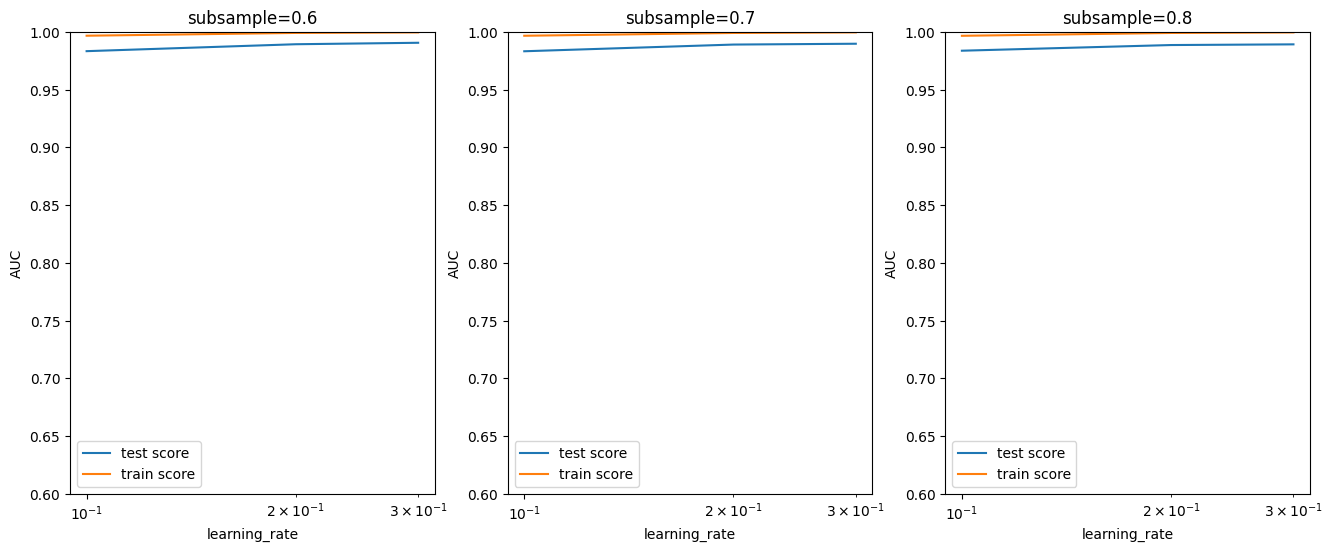

In [365]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2,0.3],
             'subsample': [0.6, 0.7, 0.8]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')


In [366]:
model_cv.best_params_


{'learning_rate': 0.3, 'subsample': 0.6}

In [367]:
# chosen hyperparameters

params = {'learning_rate': 0.3,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

**Prediction on Train dataset**

In [368]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)


In [369]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)


[[227449      0]
 [     0 227448]]


In [370]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [482]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train_adasyn, y_train_pred))



Accuracy:- 0.8859675926638337
Sensitivity:- 0.9583333333333334
Specificity:- 0.9076952836492808
F1-score: 0.8831418099243744


In [372]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [373]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]


In [374]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc


0.9999999998646893

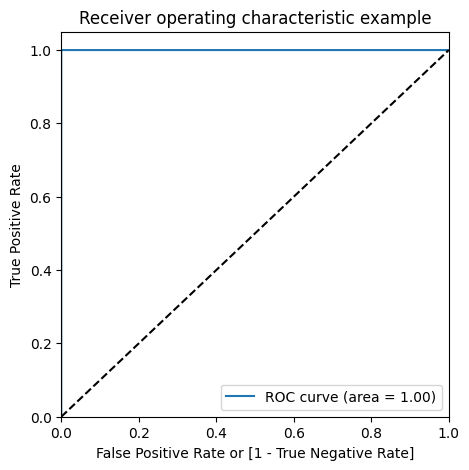

In [375]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)


**Prediction on test dataset**

In [376]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)


In [377]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56823    43]
 [   20    76]]


In [378]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [484]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_test, y_test_pred))



Accuracy:- 0.9077806256802781
Sensitivity:- 0.9583333333333334
Specificity:- 0.9076952836492808
F1-score: 0.03384219238550672


In [380]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.64      0.79      0.71        96

    accuracy                           1.00     56962
   macro avg       0.82      0.90      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [381]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]


In [382]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9539687232558413

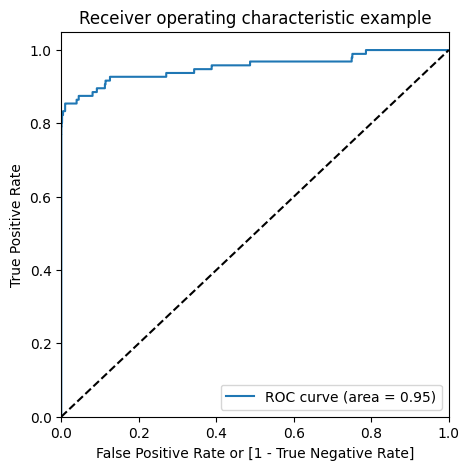

In [383]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (XGBOOST(ADASYN))**

**Train set**

Accuracy = 0.99

Sensitivity = 1

Specificity = 1

ROC = 1

**Test set**

Accuracy = 0.99

Sensitivity = 0.79

Specificity = 0.99

ROC = 0.95


## **Decision Tree**(By ADASYN)

In [384]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(25, 100, 25),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(25, 100, 25)},
             scoring='roc_auc', verbose=1)

In [385]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        8.616849      0.287714         0.058904        0.015023   
1        8.457785      0.510164         0.057870        0.013199   
2        8.269555      0.546179         0.048014        0.000487   
3        8.737108      0.715036         0.058246        0.013337   
4        8.535257      0.483074         0.057916        0.012927   
5        8.550372      0.410398         0.058197        0.014834   
6        8.426669      0.562950         0.057997        0.013479   
7        8.263203      0.533445         0.048562        0.000564   
8        8.648236      0.461799         0.058778        0.013262   
9       14.937610      0.372470         0.050529        0.000595   
10      15.020781      0.482444         0.067212        0.012688   
11      15.172733      0.488061         0.081750        0.002155   
12      14.925005      0.368146         0.050034        0.001457   
13      14.949899      0.331267         0.048670        0.000393   
14      14.930937      0.379026         0.050138        0.001969   
15      14.886830      0.385470         0.049447        0.001170   
16      14.937533      0.408228         0.048877        0.000533   
17      15.140917      0.439718         0.068506        0.012980   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                5                     25                      25   
1                5                     25                      50   
2                5                     25                      75   
3                5                     50                      25   
4                5                     50                      50   
5                5                     50                      75   
6                5                     75                      25   
7                5                     75                      50   
8                5                     75                      75   
9               10                     25                      25   
10              10                     25                      50   
11              10                     25                      75   
12              10                     50                      25   
13              10                     50                      50   
14              10                     50                      75   
15              10                     75                      25   
16              10                     75                      50   
17              10                     75                      75   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.902359   
1   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.902179   
2   {'max_depth': 5, 'min_samples_leaf': 25, 'min_...           0.902356   
3   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902583   
4   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902217   
5   {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902217   
6   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.902280   
7   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.902645   
8   {'max_depth': 5, 'min_samples_leaf': 75, 'min_...           0.902278   
9   {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925135   
10  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925207   
11  {'max_depth': 10, 'min_samples_leaf': 25, 'min...           0.925199   
12  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.929544   
13  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.928864   
14  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.928991   
15  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.934322   
16  {'max_depth': 10, 'min_samples_leaf': 75, 'min...           0.929471   
17  {'max_depth': 10, 'min_samp

In [386]:
grid_search.best_score_


0.9390497131831793

In [387]:
grid_search.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=75)

In [388]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=75,
                                  min_samples_split=75)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=75,
                       random_state=100)

**Prediction on train dataset**

In [389]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)


In [390]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)


[[216017  11432]
 [   811 226637]]


In [391]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [392]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9730862151212253
Sensitivity:- 0.9964343498294116
Specificity:- 0.9497381830652146


In [393]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [394]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]


In [395]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc


0.9919457171622241

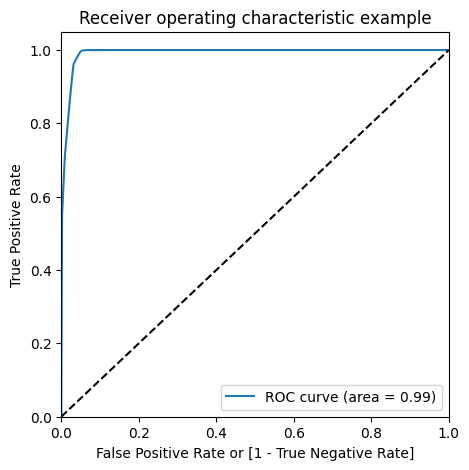

In [396]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)


**Prediction on test dataset**

In [397]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)


In [398]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[53904  2962]
 [   15    81]]


In [399]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [400]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9477370878831501
Sensitivity:- 0.84375
Specificity:- 0.9479126367249323


In [401]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [402]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]


In [403]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9197081736010975

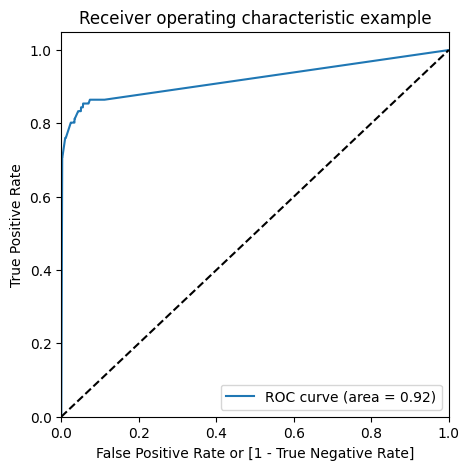

In [404]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


#### **Model summary (DECISION TREE(ADASYN))**

**Train set**

Accuracy = 0.97

Sensitivity = 0.99

Specificity = 0.94

ROC = 0.99

**Test set**

Accuracy = 0.94

Sensitivity = 0.84

Specificity = 0.94

ROC = 0.92


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 7


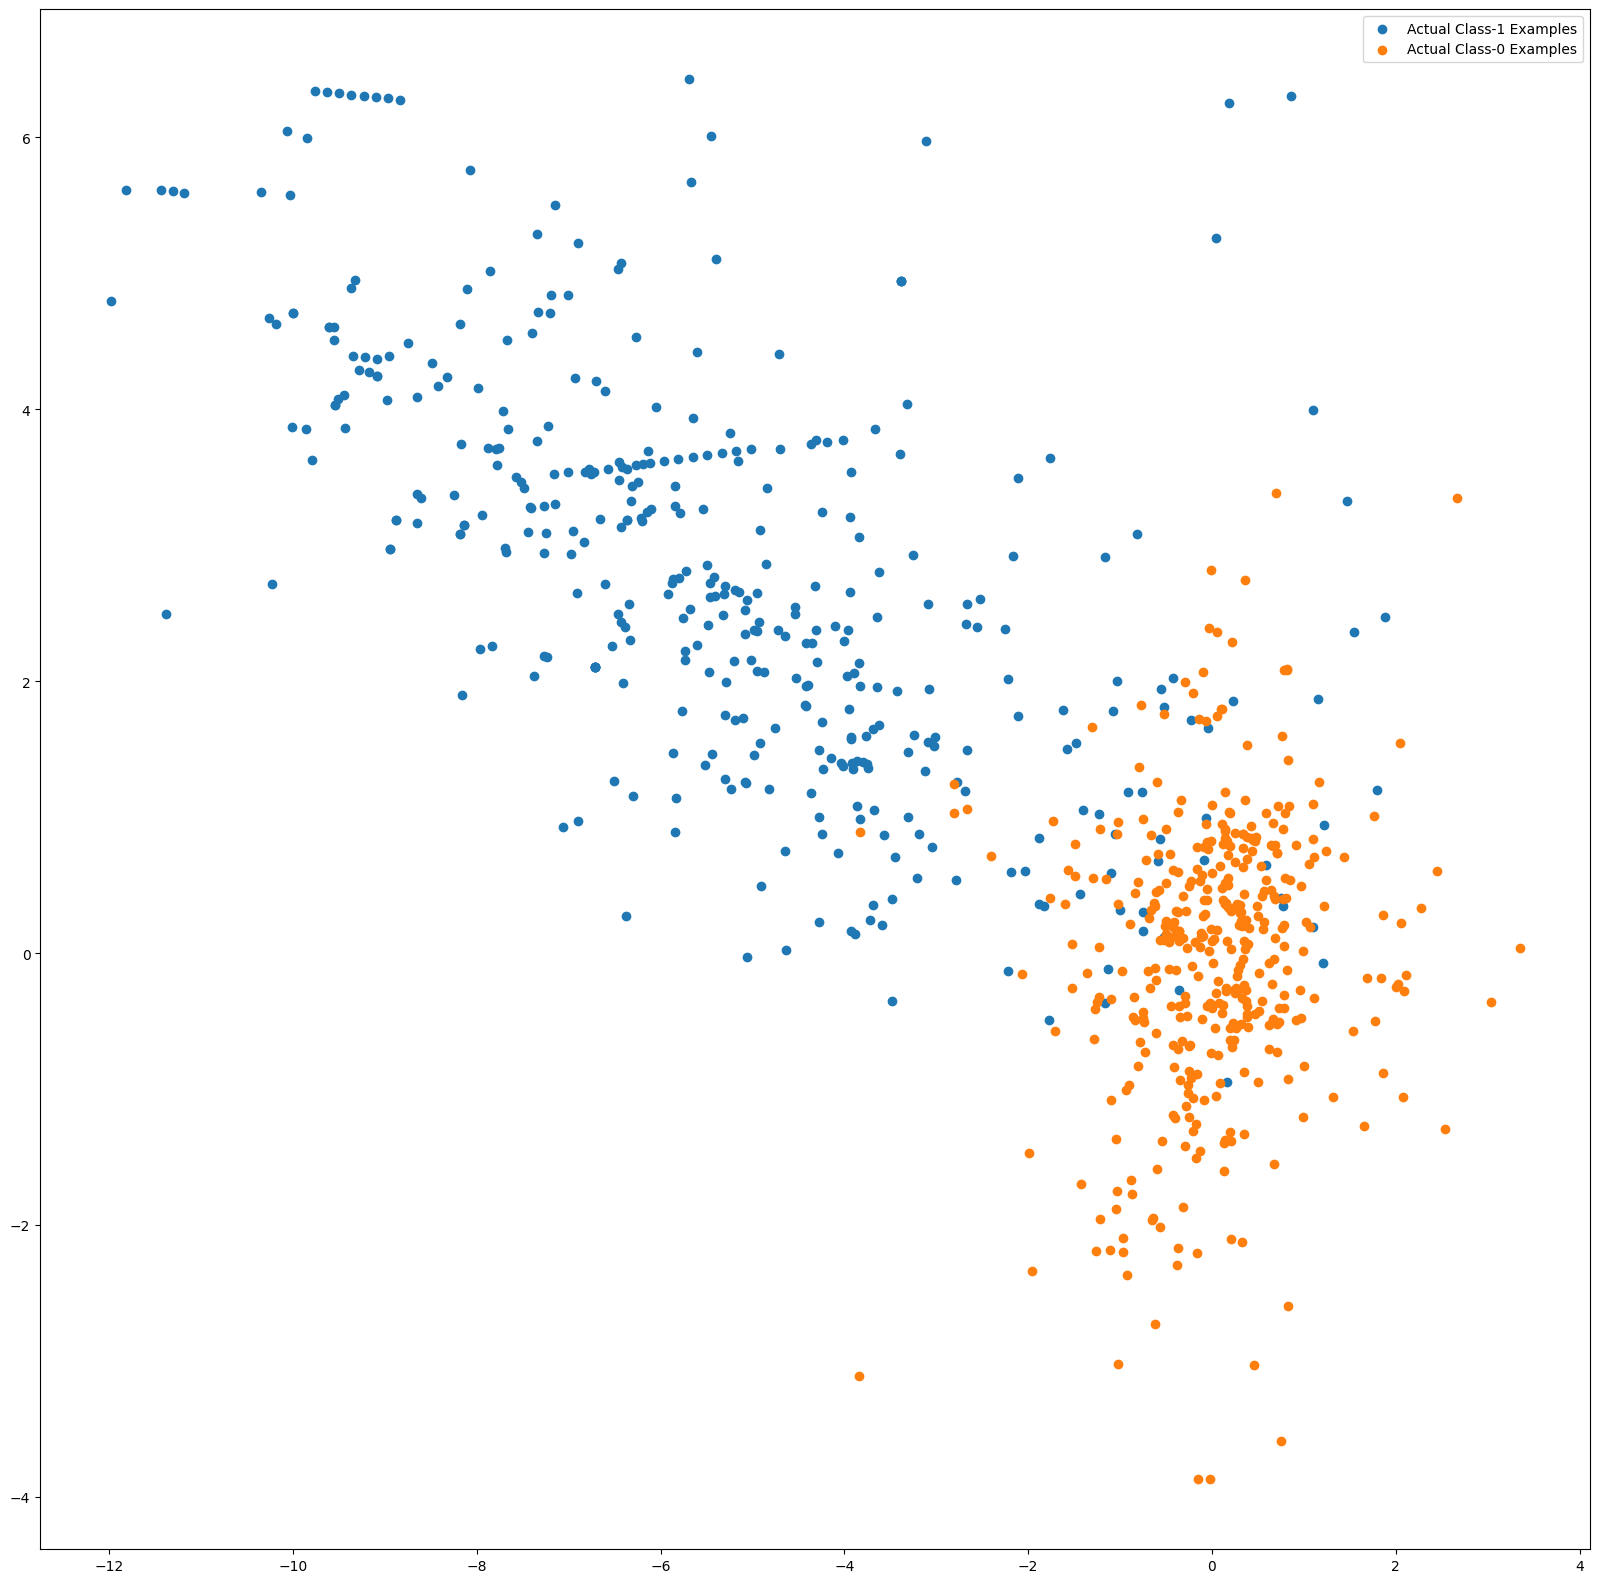

In [416]:
var_imp = []
for i in xgb_bal_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_bal_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_bal_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_bal_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_bal_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_bal_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Select the oversampling method which shows the best result on a model¶

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 95% on the test data.

Hence, we conclude that the XGBoost model with Adasyn is the best model.



**Print the FPR,TPR & select the best threshold from the roc curve for the best model**


In [408]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)


Train auc = 0.9899176766846823
Threshold= 0.5433219903582786


We can see that the threshold is 0.54, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.


# Summary to the business¶

Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(95%) and also high Recall(79%). Hence, we can go with the XGBoost model here.